<div style="background-color:rgba(230, 245, 255, 1.0); text-align:center; vertical-align: middle; padding:20px 0;border:3px; border-style:solid; padding: 0.5em; border-color: rgba(0, 153, 255, 1.0); color: #000000;">

<h1><strong>MIT Quantum Winter School</strong></h1>

<h1><strong>Day 2 - Interference</strong></h1>

<img src="figures/course_logo.png" width="500"/>

</div>

In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random

# Importing standard Qiskit libraries
import qiskit
import qiskit_aer
import pylatexenc
from qiskit import *
from qiskit_aer import *
from qiskit.compiler import transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_vector
from qiskit.quantum_info import Statevector, DensityMatrix, random_statevector
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.circuit.library import GroverOperator, MCMT, ZGate

# QWS helpers
from helpers import convert_to_basis_string, get_all_pauli_strings,interactive_sine_waves, double_slit_experiment

# Bokeh interactive plotting
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Slider, ColumnDataSource, CustomJS, Range1d, Toggle, Button, SetValue
from bokeh.layouts import column, row
from bokeh.io import push_notebook
# Initialize the notebook output
output_notebook()

nshots = 10000

Loading BokehJS ...

# Interference Between Two Sine Waves

Two sine waves interfere with each other. For two sine waves with the same amplitude and frequency, the condition for complete constructive interference is for the phase difference between the waves to be a multiple of $2\pi$, i.e. $2\pi n$ for $n\in\mathbb{Z}$. The condition of complete destructive interference is for the phase difference between the two waves to be $\pi (n + 1/2)$ for $n\in\mathbb{Z}$. For values of phase in between these special points, or if the frequency and/or amplitudes of the waves are different, there will be partial interference.

In the interactive plot below, you can play around with the properties of two sine waves and see how their sum can interfere constructively/destructively.

In [7]:
interactive_sine_waves()

# The Double Slit Experiment

Today we learned about the double slit experiment, which displays the wave-particle duality of quantum particles, such as electrons. When an electron passes through a single slit, it simply passes through and ends up on the other side. From one electron alone, we cannot tell what the probability distribution is for where our electron will be found. When we send many electrons through, however, we can see the underlying probability distribution from the build up of the electrons. *This is much like when we need to measure our qubits many times in order to obtain an estimate of the quantum state. Measuring a qubit once gives us little information.* In the case of one slit, the probability distribution will be non zero across a region with the probability peaked in the center and decaying to the sides.

Now if we add in a second slit, the electron may pass through either slit... and in fact, it will be in a *superposition* of passing through both slits! This means that our electron will *interfere with itself*, exhibiting wave-like behavior. (Of course, when you measure where the electron hits the screen, it displays particle-like behavior again since you only observe it in one place.) In this double slit case, the probability distribution for where we will find the particle will exhibit regions of constructive and destructive interference. The overall amplitude envelope will be peaked in the center and decay out to the sides, but within that there are regions where you are more or less likely to find the electron. Again, measuring only one electron will not tell us anything about the underlying probability distribution, but if we repeat this many times, the electrons will build up, revealing the underlying probability distribution.

Now we add in one more twist... What if you watch the electron and observe which slit the electron went through, the probability distribution changes again! We can observe which slit the electron goes through because it is a particle, and a particle can only be seen in one place at one time. In this case, the probability distribution will look like two of the single slit probability distributions laid on top of each other. In practice, since the slits are so close together and the screen is so far away, the distribution looks the same as just one single slit distribution. By observing which slit the electron went through, you *collapsed the electron's wave function* and the electron proceeds to behave particle-like.

<div style="background-color:rgba(255, 253, 255, 1.0); text-align:center; vertical-align: middle; padding:20px 0;border:3px; border-style:solid; padding: 0.5em; border-color: rgba(216, 129, 247, 1.0); color: #000000;">

<h4><strong>Probability Distributions for Observing vs. Ignoring</strong></h4>

Here we show the probability distribution (pmf) for the double slit experiment when you ignore which slit the electron went through:

<img src="figures/interference/interfere.png" width="500"/>

Here we show the probability distribution (pmf) for the double slit experiment when you observe which slit the electron went through:

<img src="figures/interference/gauss.png" width="500"/>

</div>

\
In the interactive plot below, we show the double slit experiment for electrons with a wavelength of 10 picometers ($10^{-12}$ m). You can play around with the distance between the two slits, the distance from the slits to the screen, and the number of electrons fired at one time. You can also toggle between observing which slit the electron went through versus ignoring.

In [13]:
# Create an instance of the double_slit_bokeh class
slit_simulation = double_slit_experiment()

### Comprehension Question:

**A)** If you set the number of electrons really low (around 5), can you tell the difference between the probability distribution from when you ignore vs. observe the electron? 

No. For a single electron or a few electrons, we cannot see the underlying probability distribution. This only emerges as many electrons build up.

**B)** How does the distance between the slits impact the probability distribution?

When the slits are closer, the dark spots of total destructive interference spread out. When the slits are further apart, the dark spots of total destructive interference get closer.

**C)** How does the distance to the screen impact the probability distribution?

When the distance to the screen is further, the dark spots of total destructive interference spread out. When the distance to the screen is closer, the dark spots of total destructive interference get closer.

**D)** What do you think would happen if we had three slits instead of two? Consider the following two cases:

1. What kind of probability distribution would you expect if we ignored the electron vs. observed which of the three slits it went through?

We would expect there to be an interference pattern when we ignored the electron (it will be a more complicated pattern than two slits, but an interference pattern nonetheless.) If we observed, then the electrons would behave as particles and not interfere with themselves, leading to a smooth spread with no interference pattern.
   
2. What kind of probability distribution would you expect if we ignored the electron vs. observed whether or not it went through the center slit?

We would only know whether or not it went through the center slit. If the electron passes through the center slit, it behaves like a particle. If it does not pass through the center slit, it behaves like a wave, interfering with itself from the two outer slits. So we would expect to see a probability distribution which is the particle-like distribution plus the wave-like distribution.

# Measuring in different bases

Yesterday and today in class, we learned about different quantum operators and different bases for measurement. Today, we'll start off with a quick review of measurement in these different bases.

We'll start off by generating a state and plotting it on the Bloch sphere. We'll also show the circuit used to prepare it. By default, `qc = QuantumCircuit(n)` will initialize all qubits to the all-zeros state.

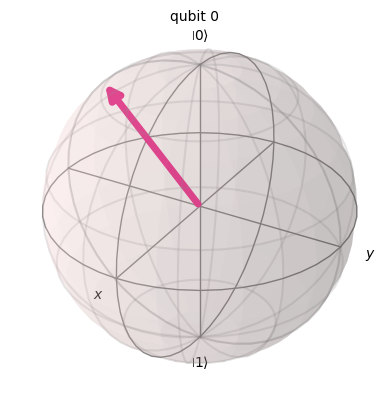

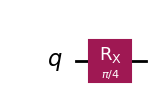

In [5]:
qc = QuantumCircuit(1)
qc.rx(np.pi/4, 0)
display(Statevector(qc).draw('bloch'))
display(qc.draw('mpl'))

## Measuring in the Z basis

Written in braket notation, the state is ...

In [6]:
qc = QuantumCircuit(1)
qc.rx(np.pi/4, 0)
display(Statevector(qc).draw('latex'))

<IPython.core.display.Latex object>

### Comprehension Question:
If we prepare and measure this state ten thousand times in the Z basis, what would we expect our measurement histogram to be? (You can give approximate answers.)

**We would expect to measure $|0\rangle$ approximately $10000*|0.923879...|^2 \approx 8536$ times and $|1\rangle$ approximately $10000*|0.382683...i|^2 \approx 1464$ times.**

### Comparing to the histogram...

The standard Qiskit measurement operation will measure the qubit in the Z basis, projecting it to either pole along the Z axis. We can repeat this experiment many times (`nshots` times) and plot the histogram below. Let's see how this compares to our analytical solution above.

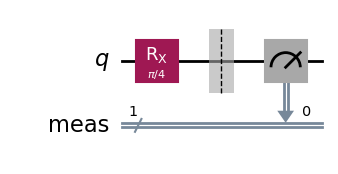

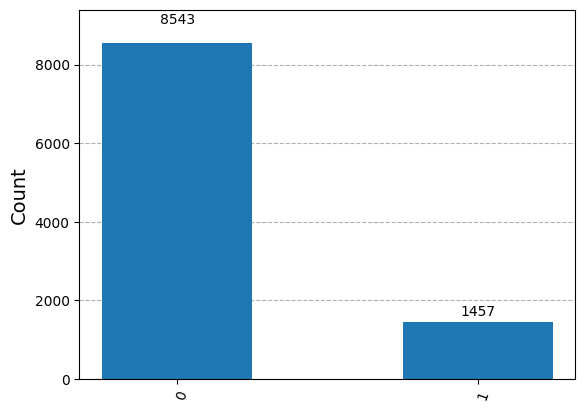

In [7]:
qc = QuantumCircuit(1)
qc.rx(np.pi/4, 0)
qc.measure_all()
display(qc.draw('mpl'))

backend = Aer.get_backend('qasm_simulator')

new_circuit = transpile(qc, backend)
job = backend.run(new_circuit, shots = nshots)
results = job.result()
counts = results.get_counts()

display(plot_histogram(counts))

The overall experiment is equivalent to the following pseudocode:

```python
histogram = {0: 0, 1: 0}
for i in range(nshots):
    qc.prepare(state)
    result = qc.measure() # returns 0 or 1
    if result == 0:
        histogram[0] += 1
    else:
        histogram[1] += 1
plot(histogram)
```

We are re-initializing and re-running this entire circuit for every shot, and the outcome of each shot may be different. Over many shots, we build up our histogram.

Rerun the above cell a few times. Note that each time we rerun the above cell, our histogram also changes by a slight amount. This is because the Qiskit simulator is sampling from a probability distribution to measure each shot, so each experimental run (comprising many shots) will have had a slightly different number of its shots evaluate to $0$ or $1$. As `nshots` tends to $\infty$, the histogram will approach the mathematically expected value that you calculated above.

### Comprehension Question:
What would the histogram look like if we took repeated measurements without re-running the circuit? (i.e. feed the output of the first measurement into the second measurement, then feed the output of the second measurement into the third measurement, etc.)

**Since successive measurements in the same basis should result in the same outcome, we would expect to get 10000 of whichever outcome we measured on the first measurement and 0 of the other outcome.**

## Measuring in other bases

We can also reuse the same circuit to prepare the same state but instead measure in the X basis.

Qiskit only allows us to measure in the Z basis, so we apply the $H$ gate to map the $|+\rangle$ and $|-\rangle$ states to $|0\rangle$ and $|1\rangle$, respectively. We then measure using the standard Qiskit measurement operator and interpret our results according to our mapping.

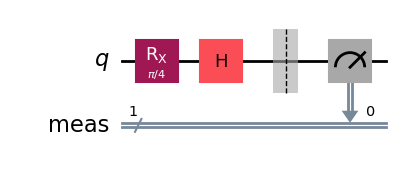

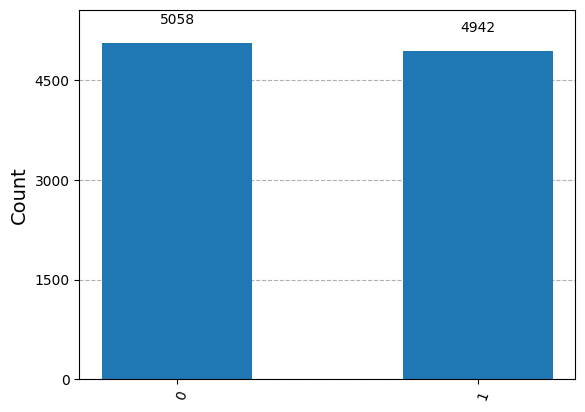

In [8]:
qc = QuantumCircuit(1)
qc.rx(np.pi/4, 0)
qc.h(0)
qc.measure_all()
display(qc.draw('mpl'))

backend = Aer.get_backend('qasm_simulator')

new_circuit = transpile(qc, backend)
job = backend.run(new_circuit, shots = nshots)
results = job.result()
counts = results.get_counts()

display(plot_histogram(counts))

The measurement outcomes $0$ and $1$ correspond to $|+\rangle$ and $|-\rangle$, respectively.

We can also measure in the Y basis, applying $HS^\dagger$ to map $|+i\rangle$ and $|-i\rangle$ to $|0\rangle$ and $|1\rangle$, respectively. Note that the operator $HS^\dagger$ corresponds to first applying $S^\dagger$ and then $H$ to the state. This is consistent with $S^\dagger$ being to the left of $H$ in the circuit below.

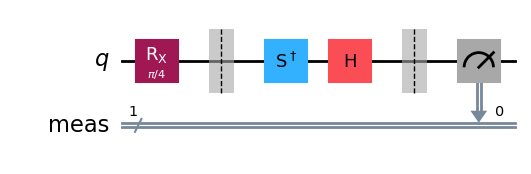

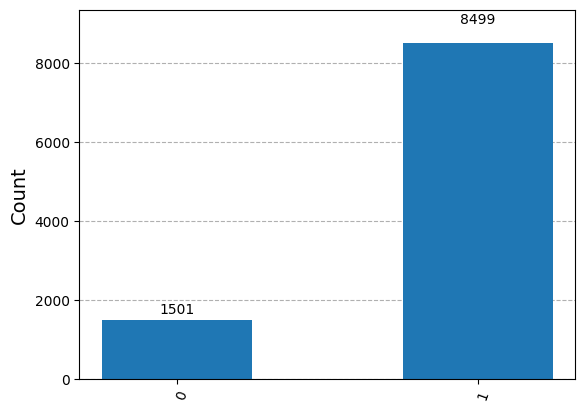

In [9]:
qc = QuantumCircuit(1)
qc.rx(np.pi/4, 0)
qc.barrier()
qc.sdg(0)
qc.h(0)
qc.measure_all()
display(qc.draw('mpl'))

backend = Aer.get_backend('qasm_simulator')

new_circuit = transpile(qc, backend)
job = backend.run(new_circuit, shots = nshots)
results = job.result()
counts = results.get_counts()

display(plot_histogram(counts))

The measurement outcomes $0$ and $1$ correspond to $|+i\rangle$ and $|-i\rangle$, respectively.

## Why is it important to be able to measure in different bases?

Let's take two quantum states, $|+i\rangle$ and $|-i\rangle$. Suppose someone gives you an infinite stream of one of these states, but you don't know which one you have.

You would like to know which state you have. Suppose that you are also able to perform measurements and gates on your states. What kinds of gates or measurements will be useful?

Let's take a look at the distribution for measurement of these two states in the Z basis.

<IPython.core.display.Latex object>

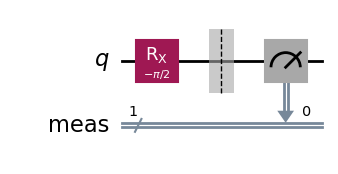

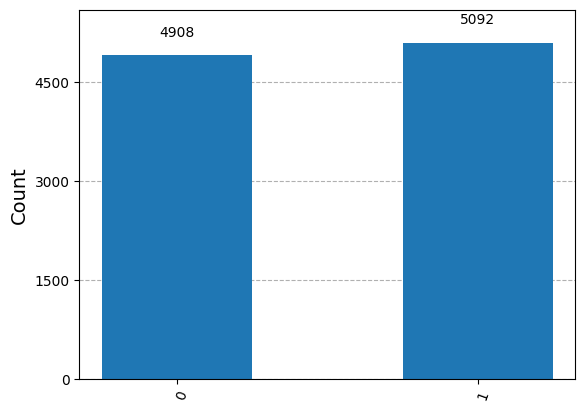

In [10]:
qc = QuantumCircuit(1)
qc.rx(-np.pi/2, 0)
display(Statevector(qc).draw('latex'))
qc.measure_all()
display(qc.draw('mpl'))

backend = Aer.get_backend('qasm_simulator')

new_circuit = transpile(qc, backend)
job = backend.run(new_circuit, shots = nshots)
results = job.result()
counts = results.get_counts()

display(plot_histogram(counts))

<IPython.core.display.Latex object>

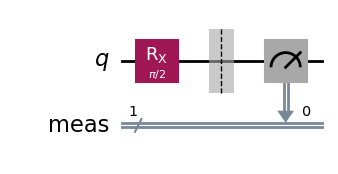

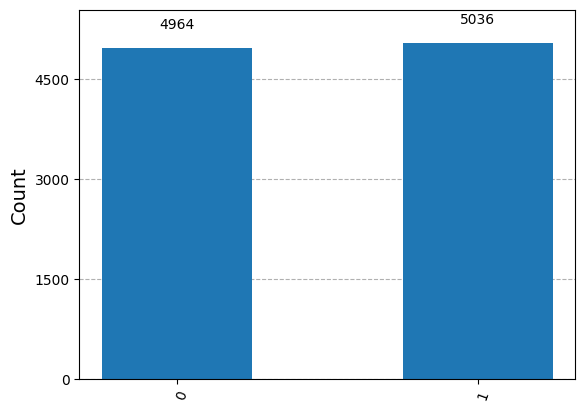

In [11]:
qc = QuantumCircuit(1)
qc.rx(np.pi/2, 0)
display(Statevector(qc).draw('latex'))
qc.measure_all()
display(qc.draw('mpl'))

backend = Aer.get_backend('qasm_simulator')

new_circuit = transpile(qc, backend)
job = backend.run(new_circuit, shots = nshots)
results = job.result()
counts = results.get_counts()

display(plot_histogram(counts))

### Conclusion

These distributions are essentially identical, so repeatedly measuring in the Z basis doesn't help us differentiate between the states. However, if we can measure in another basis that distinguishes these states, that might be useful.

## Exercises


### Differentiate between $|+i\rangle$ and $|-i\rangle$

Design a protocol to distinguish between $|+i\rangle$ and $|-i\rangle$. What is the minimum number of measurements (shots) you need to do this? How many gates do you need?

In [12]:
# write your protocol
def distinguish_plus_minus_i(statevector: Statevector):
    # Function to identify the input state
    # Input: a Qiskit Statevector encoding one of ['+i', '-i']
    # Output: '+i' or '-i'
    
    # starter code
    qc = QuantumCircuit(1)
    qc.initialize(statevector)
    qc.sdg(0)
    qc.h(0)
    qc.measure_all()
    backend = Aer.get_backend('qasm_simulator')
    new_circuit = transpile(qc, backend)
    job = backend.run(new_circuit, shots = 1)
    results = job.result()
    counts = results.get_counts()

    if counts.get('0', 0) > counts.get('1', 0):
        return '+i'
    else:
        return '-i'

In [13]:
# test your protocol
assert distinguish_plus_minus_i(Statevector.from_label('r')) == '+i', "State detector did not work"
assert distinguish_plus_minus_i(Statevector.from_label('l')) == '-i', "State detector did not work"

**You only need to measure once in the Y basis, which requires two additional gates.**

### Determine the state

Design a protocol to distinguish between $|0\rangle$, $|1\rangle$, $|+\rangle$, $|-\rangle$, $|+i\rangle$ and $|-i\rangle$, assuming someone gives you an infinite stream of one such state. What is the minimum number of measurements (shots) you need to do this? How many gates do you need?

You may use
```python
qc = QuantumCircuit(1)
qc.initialize(statevector)
```
as many times as you'd like to initialize your circuit with the input state. You may not investigate other properties of the `statevector` variable.

In [14]:
# write your protocol
def state_detector(statevector: Statevector):
    # Function to identify the input state
    # Input: a Qiskit Statevector encoding one of ['0', '1', '+', '-', '+i', '-i']
    # Output: one of ['0', '1', '+', '-', '+i', '-i']

    def prepare():
        qc = QuantumCircuit(1)
        qc.initialize(statevector)
        return qc

    X, Y, Z = True, True, True
    X_outcomes, Y_outcomes, Z_outcomes = set(), set(), set()

    while X + Y + Z > 1:
        if Z:
            qc = prepare()
            qc.measure_all()
            backend = Aer.get_backend('qasm_simulator')
            new_circuit = transpile(qc, backend)
            job = backend.run(new_circuit, shots = 1)
            results = job.result()
            counts = results.get_counts()
            Z_outcomes.add('0' if counts.get('0', 0) > counts.get('1', 0) else '1')
            if '0' in Z_outcomes and '1' in Z_outcomes:
                Z = False

        if X:
            qc = prepare()
            qc.h(0)
            qc.measure_all()
            backend = Aer.get_backend('qasm_simulator')
            new_circuit = transpile(qc, backend)
            job = backend.run(new_circuit, shots = 1)
            results = job.result()
            counts = results.get_counts()
            X_outcomes.add('0' if counts.get('0', 0) > counts.get('1', 0) else '1')
            if '0' in X_outcomes and '1' in X_outcomes:
                X = False

        if Y:
            qc = prepare()
            qc.sdg(0)
            qc.h(0)
            qc.measure_all()
            backend = Aer.get_backend('qasm_simulator')
            new_circuit = transpile(qc, backend)
            job = backend.run(new_circuit, shots = 1)
            results = job.result()
            counts = results.get_counts()
            Y_outcomes.add('0' if counts.get('0', 0) > counts.get('1', 0) else '1')
            if '0' in Y_outcomes and '1' in Y_outcomes:
                Y = False

    if X:
        return {'0': '+', '1': '-'}[X_outcomes.pop()]
    if Y:
        return {'0': '+i', '1': '-i'}[Y_outcomes.pop()]
    if Z:
        return {'0': '0', '1': '1'}[Z_outcomes.pop()]


In [15]:
# test your protocol
assert state_detector(Statevector.from_label('0')) == '0', "State detector did not work"
assert state_detector(Statevector.from_label('1')) == '1', "State detector did not work"
assert state_detector(Statevector.from_label('+')) == '+', "State detector did not work"
assert state_detector(Statevector.from_label('-')) == '-', "State detector did not work"
assert state_detector(Statevector.from_label('r')) == '+i', "State detector did not work"
assert state_detector(Statevector.from_label('l')) == '-i', "State detector did not work"

**We cyclically measure in the X, Y, and Z bases. If any set of measurements along the same basis yields different results, we can rule out that basis' eigenstates for our solution. We continue until we've ruled out two of the bases; then, our state is whichever eigenstate of the remaining basis we've measured.**

**If your measurements have perfect fidelity, your state is $|\pm i\rangle$, and your X and Z measurements each yield different results the first two times, you need at least five measurements and at least four gates. However, if measurements in the bases your state is not in repeatedly return the same result (with exponentially decreasing probability as you increase the number of shots), you will need to continue through the process until you have enough results to rule out the incorrect bases.**

### Challenge Problem: Two Qubits

Design a protocol to distinguish between $\frac{|00\rangle+|11\rangle}{\sqrt{2}}$, $\frac{|00\rangle-|11\rangle}{\sqrt{2}}$, $\frac{|01\rangle+|10\rangle}{\sqrt{2}}$, and $\frac{|01\rangle-|10\rangle}{\sqrt{2}}$ assuming someone gives you an infinite stream of one such two-qubit state. What is the minimum number of measurements (shots) you need to do this? How many gates do you need?

You may use
```python
qc = QuantumCircuit(2)
qc.initialize(statevector)
```
as many times as you'd like to initialize your circuit with the input state. You may not investigate other properties of the `statevector` variable.

Hint: you may use the $CX$ or $CNOT$ gate.

In [16]:
# write your protocol
def state_detector_bell(statevector):
    # Function to identify the input state
    # Input: a Qiskit Statevector encoding one of the four states above
    # Output: one of [0, 1, 2, 3]
    
    # starter code
    qc = QuantumCircuit(2)
    qc.initialize(statevector)
    qc.cx(0,1)
    qc.h(0)
    qc.measure_all()
    backend = Aer.get_backend('qasm_simulator')
    new_circuit = transpile(qc, backend)
    job = backend.run(new_circuit, shots = 1)
    results = job.result()
    counts = results.get_counts()
    
    return int(list(counts)[0], 2)
    return # one of [0, 1, 2, 3]

In [17]:
# test your protocol
assert state_detector_bell(Statevector(np.array([1,0,0,+1])/np.sqrt(2))) == 0, "State detector did not work"
assert state_detector_bell(Statevector(np.array([1,0,0,-1])/np.sqrt(2))) == 1, "State detector did not work"
assert state_detector_bell(Statevector(np.array([0,1,+1,0])/np.sqrt(2))) == 2, "State detector did not work"
assert state_detector_bell(Statevector(np.array([0,1,-1,0])/np.sqrt(2))) == 3, "State detector did not work"

**You can map the Bell states back to the computational basis by applying $H \cdot CX $ and then measure in the computational basis, or you can "measure in the Bell basis" by applying $H \cdot CX $ and measuring in the computational basis -- both procedures are entirely identical and require two gates and only one shot.**

# Quantum State Tomography

What we have been doing above is a kind of protocol known as quantum state tomography. In general, this protocol allows for the reconstruction of an unknown quantum state, provided we can repeatedly create and measure it.

Why would this be useful? Let's say we are running an experiment in which we are preparing a particular useful state. If we want to ensure that our experiment is working correctly, we can repeatedly run the experiment from the same initial conditions. We can perform quantum state tomography on the resulting state, measuring it in different bases to confirm that we've prepared the correct state. (Note that this does not violate the no-cloning theorem, because we are following a deterministic protocol to generate a specific state.)

Let's see this in action.

In the following cell, we prepare a quantum state. You can uncomment the commented lines to see the intermediate circuits and intermediate states plotted on the Bloch sphere.

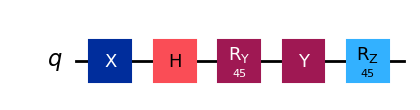

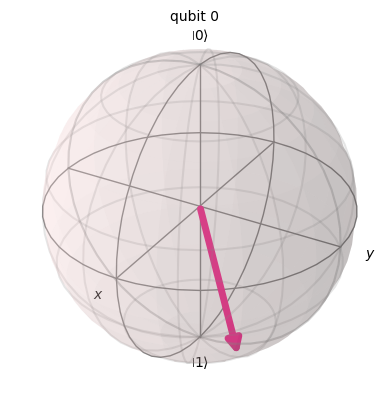

In [18]:
qc = QuantumCircuit(1)
# display(qc.draw('mpl'))
# display(Statevector(qc).draw('bloch'))

qc.x(0)
# display(qc.draw('mpl'))
# display(Statevector(qc).draw('bloch'))

qc.h(0)
# display(qc.draw('mpl'))
# display(Statevector(qc).draw('bloch'))

qc.ry(45, 0)
# display(qc.draw('mpl'))
# display(Statevector(qc).draw('bloch'))

qc.y(0)
# display(qc.draw('mpl'))
# display(Statevector(qc).draw('bloch'))

qc.rz(45, 0)
display(qc.draw('mpl'))
display(Statevector(qc).draw('bloch'))

The Bloch sphere picture gives us some sense of the expectation values of the states. If we were to measure the qubit in the Z basis, we'd get a distribution of $\{|0\rangle, |1\rangle\}$ proportionate to the projection of the state onto the Z axis. And likewise for the other two axes.

## Exercises

### Histograms

Measure the state generated above in the X, Y, and Z bases and obtain the histograms.

Here is the condensed code to generate the circuit:

```python
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.ry(45, 0)
qc.y(0)
qc.rz(45, 0)
```

You may invoke this as many times as you need.

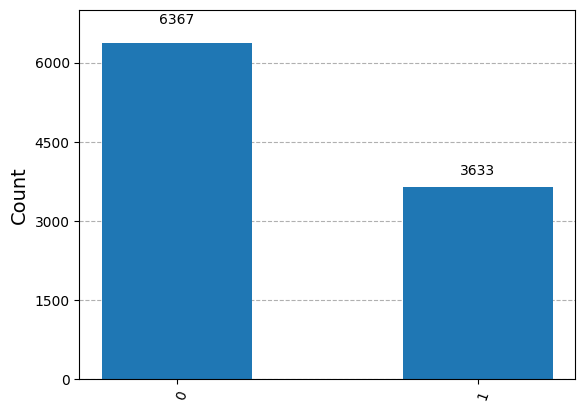

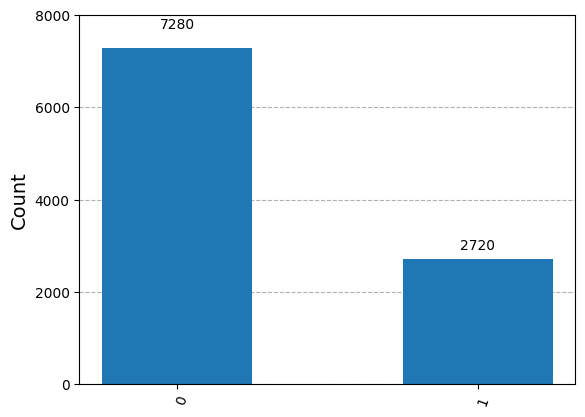

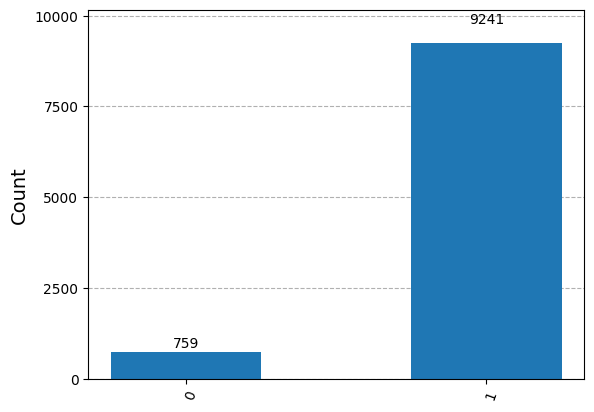

In [19]:
def prepare():
    qc = QuantumCircuit(1)
    qc.x(0)
    qc.h(0)
    qc.ry(45, 0)
    qc.y(0)
    qc.rz(45, 0)
    return qc


qc = prepare()
qc.measure_all()
backend = Aer.get_backend('qasm_simulator')
new_circuit = transpile(qc, backend)
job = backend.run(new_circuit, shots = nshots)
results = job.result()
z_counts = results.get_counts()
qc = prepare()
qc.h(0)
qc.measure_all()
backend = Aer.get_backend('qasm_simulator')
new_circuit = transpile(qc, backend)
job = backend.run(new_circuit, shots = nshots)
results = job.result()
x_counts = results.get_counts()
qc = prepare()
qc.sdg(0)
qc.h(0)
qc.measure_all()
backend = Aer.get_backend('qasm_simulator')
new_circuit = transpile(qc, backend)
job = backend.run(new_circuit, shots = nshots)
results = job.result()
y_counts = results.get_counts()

display(plot_histogram(x_counts))
display(plot_histogram(y_counts))
display(plot_histogram(z_counts))

### Expectation values

We now compute the expectation values for the three measurements.

In this scheme, $|0\rangle$, $|+\rangle$, and $|+i\rangle$ correspond to a value of +1, and $|1\rangle$, $|-\rangle$, and $|-i\rangle$ correspond to a value of -1.

For each basis, we multiply the number of counts in each bin by the respective "expectation" value for each bin and then take the average over `nshots` to obtain the expectation value.

In [20]:
sx = (x_counts['0']-x_counts['1'])/nshots
sy = (y_counts['0']-y_counts['1'])/nshots
sz = (z_counts['0']-z_counts['1'])/nshots
print(sx, sy, sz)

0.2734 0.456 -0.8482


If we did everything right, we can plot the expectations on the Bloch sphere and compare it to the initial state.

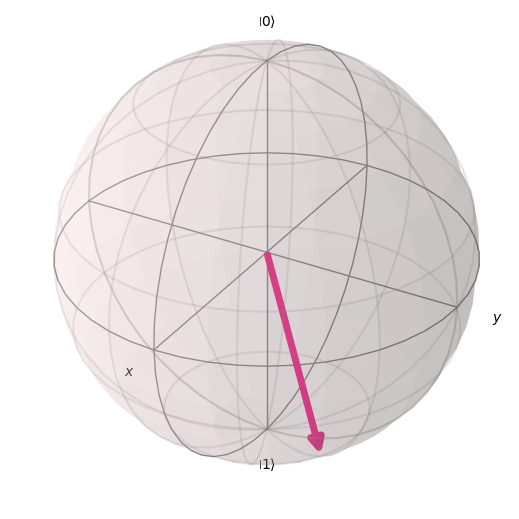

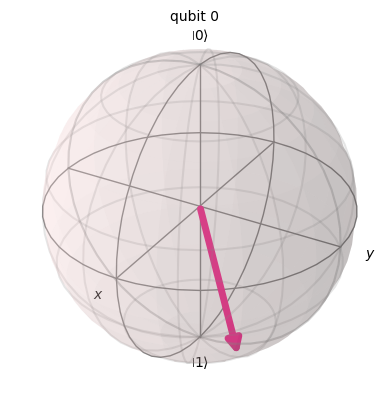

In [21]:
display(plot_bloch_vector([sx,sy,sz]))
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.ry(45, 0)
qc.y(0)
qc.rz(45, 0)
display(Statevector(qc).draw('bloch'))

### Challenge Problem: Reconstructing the State

We can go one step further and obtain the amplitudes of the state as well.

Per the lecture notes, if $$S = \begin{pmatrix} s_x \\ s_y \\ s_z \end{pmatrix} = \begin{pmatrix} \sin\theta\cos\phi \\ \sin\theta\sin\phi \\ \cos\theta \end{pmatrix},$$ where $S$ is the state's vector coordinates on the Bloch sphere and $s_x = \langle X \rangle$ is the expectation of measurement in the $X$ basis, then $$|\psi\rangle = \cos\frac{\theta}{2}|0\rangle + e^{i\phi}\sin\frac{\theta}{2}|1\rangle.$$

Using the measurement data you collected above, can you reconstruct $|\psi\rangle$? Recall that $\arccos$ and $\arcsin$ are multivalued, so you might have to apply some extra logic to ensure you have the correct values.

In [22]:
theta = np.arccos(sz)
phi = np.atan2(sy, sx)

psi = Statevector([np.cos(theta/2), np.exp(1j*phi)*np.sin(theta/2)])

'Statevector([ 0.13301581+0.23844293j, -0.46866385+0.84012259j],\n            dims=(2,))'

'Statevector([0.27549955+0.j        , 0.49431947+0.82446847j],\n            dims=(2,))'

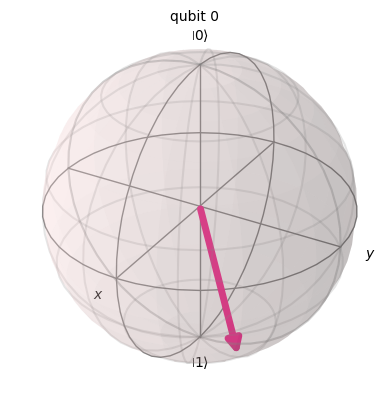

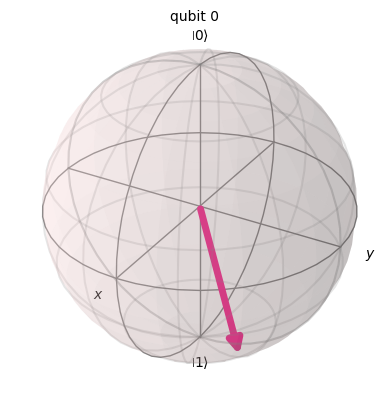

In [23]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.ry(45, 0)
qc.y(0)
qc.rz(45, 0)
display(Statevector(qc).draw())
display(psi.draw())
display(Statevector(qc).draw('bloch'))
display(psi.draw('bloch'))

**By inspection, these are equivalent up to a global phase.**

### Challenge Problem: Putting it All Together

Below is a code snippet that generates a random pure state $|\psi\rangle$, uniformly distributed over the Bloch sphere, and plots it on the Bloch sphere. You can repeatedly rerun the code to generate a new state.

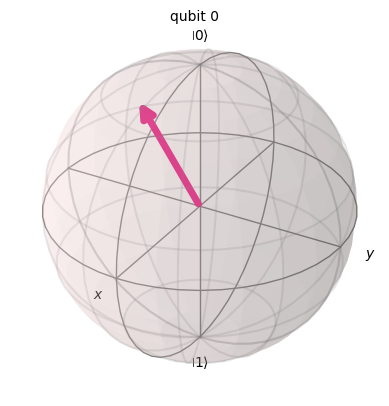

In [24]:
# statevector = Statevector(qiskit.circuit.library.UGate(np.arccos(1-2*random.random()), 2*np.pi*random.random(), 2*np.pi*random.random()))
statevector = random_statevector(2)
display(statevector.draw('bloch'))

Now suppose that someone picks a particular random state. We wish to find out which state they chose. They can supply us with an infinite number of qubits prepared in this particular state. However, all we can do is repeatedly measure the state in various bases. How can we determine the state?

You may use
```python
qc = QuantumCircuit(1)
qc.initialize(statevector)
```
as many times as you'd like to initialize your circuit with the input state. You may not investigate other properties of the `statevector` variable.

Hint: put together everything you did in the previous few exercises.

In [25]:
# write your protocol
def random_state_reconstructor(statevector: Statevector):
    # Function to reconstruct the random input state
    # Input: a Qiskit Statevector
    # Output: a Qiskit Statevector
    
    # starter code
    # *FILL IN*
    qc = QuantumCircuit(1)
    qc.initialize(statevector)
    qc.measure_all()
    backend = Aer.get_backend('qasm_simulator')
    new_circuit = transpile(qc, backend)
    job = backend.run(new_circuit, shots = nshots)
    results = job.result()
    z_counts = results.get_counts()
    
    qc = QuantumCircuit(1)
    qc.initialize(statevector)
    qc.h(0)
    qc.measure_all()
    backend = Aer.get_backend('qasm_simulator')
    new_circuit = transpile(qc, backend)
    job = backend.run(new_circuit, shots = nshots)
    results = job.result()
    x_counts = results.get_counts()
    
    qc = QuantumCircuit(1)
    qc.initialize(statevector)
    qc.sdg(0)
    qc.h(0)
    qc.measure_all()
    backend = Aer.get_backend('qasm_simulator')
    new_circuit = transpile(qc, backend)
    job = backend.run(new_circuit, shots = nshots)
    results = job.result()
    y_counts = results.get_counts()
    
    sx = (x_counts['0']-x_counts['1'])/nshots
    sy = (y_counts['0']-y_counts['1'])/nshots
    sz = (z_counts['0']-z_counts['1'])/nshots
    theta = np.arccos(sz)
    phi = np.atan2(sy, sx)
    
    psi = Statevector([np.cos(theta/2), np.exp(1j*phi)*np.sin(theta/2)])
    return psi

In [26]:
psi = random_state_reconstructor(statevector)

Did we get it right? Let's plot Bloch vectors for the initial and reconstructed states.

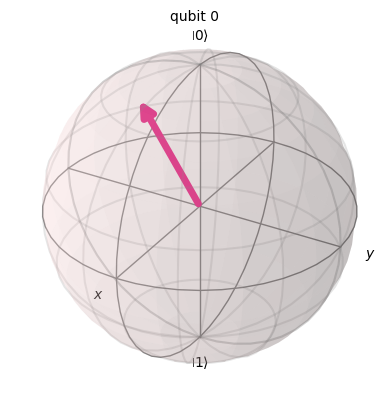

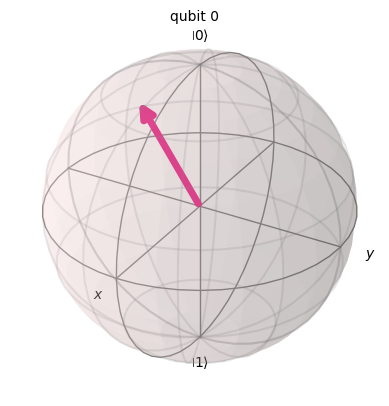

In [27]:
display(psi.draw('bloch'))
display(statevector.draw('bloch'))

And we can compare the statevector representations, as well:

In [28]:
display(psi.draw('latex'))
display(statevector.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

If we did everything correctly, these should be identical, up to a global phase. This is because we imposed a constraint on our reconstruction algorithm that the amplitude of $|0\rangle$ be real, whereas this constraint is not present in the `random_statevector` function. Note that we are unable to recover global phase in this sort of tomography

# State preparation

## Exercises

### Bell States

Sometimes, it is useful to prepare certain quantum states. 

Design circuits to prepare the following states, assuming the initial state is all zeros. Compare the LaTeX output above each circuit diagram to the expression in the problem statement.

**1.** $\frac{|00\rangle+|11\rangle}{\sqrt{2}}$

**2.** $\frac{|00\rangle-|11\rangle}{\sqrt{2}}$

**3.** $\frac{|01\rangle+|10\rangle}{\sqrt{2}}$

**4.** $\frac{|01\rangle-i|10\rangle}{\sqrt{2}}$

<IPython.core.display.Latex object>

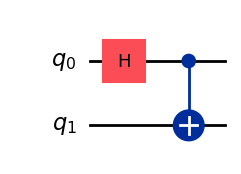

In [29]:
# 1

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
display(Statevector(qc).draw('latex'))
display(qc.draw('mpl'))

<IPython.core.display.Latex object>

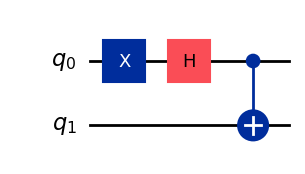

In [30]:
# 2

qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.cx(0,1)
display(Statevector(qc).draw('latex'))
display(qc.draw('mpl'))

<IPython.core.display.Latex object>

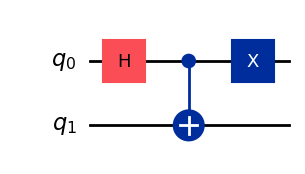

In [31]:
# 3

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.x(0)
display(Statevector(qc).draw('latex'))
display(qc.draw('mpl'))

<IPython.core.display.Latex object>

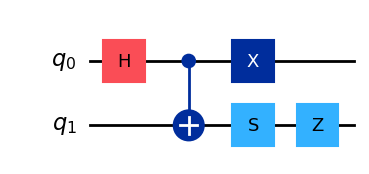

In [32]:
# 4

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.x(0)
qc.s(1)
qc.z(1)
display(Statevector(qc).draw('latex'))
display(qc.draw('mpl'))

### Challenge Problem: 3-Cat State

Prepare the three-qubit cat state $\frac{|000\rangle+|111\rangle}{\sqrt{2}}$


<IPython.core.display.Latex object>

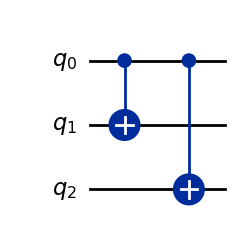

In [33]:
qc = QuantumCircuit(3)
qc.cx(0,1)
qc.cx(0,2)
display(Statevector(qc).draw('latex'))
display(qc.draw('mpl'))

### Challenge Problem: N-Cat State

Prepare the n-qubit cat state $\frac{|0....0\rangle+|1...1\rangle}{2}$


In [34]:
def cat_state(n):
    qc = QuantumCircuit(n)
    qc.h(0)
    for i in range(1,n):
        qc.cx(0,i)
    return qc

<IPython.core.display.Latex object>

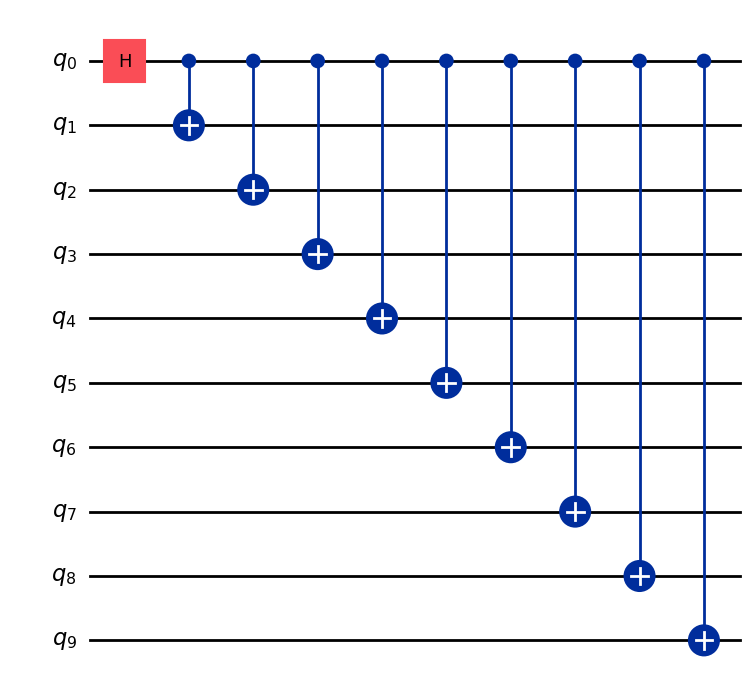

In [35]:
qc = cat_state(10)
state = Statevector(qc)
display(state.draw('latex'))
display(qc.draw('mpl'))

### Challenge Problem: Four-Qubit Parity

Design a circuit that prepares an equal superposition of all four-qubit states, in which strings with an even Hamming weight (number of ones in the string) have positive amplitude, and all strings of odd Hamming weight have negative amplitude.

Example of desired end-state for two qubits: $$\frac{|00\rangle-|01\rangle-|10\rangle+11\rangle}{2}$$.

Example of desired end-state for three qubits: $$\frac{|000\rangle-|001\rangle-|010\rangle+|011\rangle-|100\rangle+|011\rangle+|101\rangle-|111\rangle}{2\sqrt{2}}$$.

Hint: Starting from the all-zeros string, apply $H$ to every qubit to move to the equal superposition state.

<IPython.core.display.Latex object>

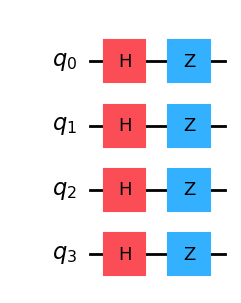

In [36]:
qc = QuantumCircuit(4)
for i in range(4):
    qc.h(i)
    qc.z(i)
state = Statevector(qc)
display(state.draw('latex'))
display(qc.draw('mpl'))

### Challenge Problem: N-Qubit Parity

Can you make a state-preparing that works for arbitrarily-sized inputs?

In [37]:
def state_preparer(n):
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.h(i)
        qc.z(i)
    return qc

<IPython.core.display.Latex object>

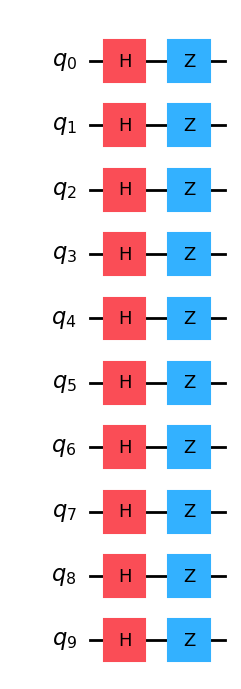

In [38]:
qc = state_preparer(10)
state = Statevector(qc)
display(state.draw('latex'))
display(qc.draw('mpl'))

### Challenge Problem: Only Two of Three Qubits

Example of desired end-state for three qubits: $$\frac{|000\rangle+|001\rangle+|010\rangle-|011\rangle+|100\rangle-|011\rangle-|101\rangle+|111\rangle}{2\sqrt{2}}$$.

Hint: you can use the $CZ$ and $CCZ$ gates.

$$CZ = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1 \end{pmatrix}$$

$$CCZ = \begin{pmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 \end{pmatrix}$$

<IPython.core.display.Latex object>

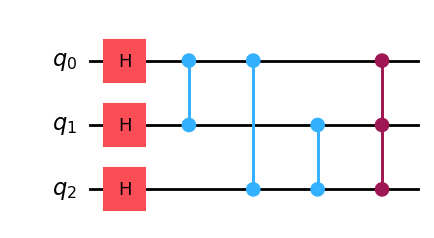

In [39]:
qc = QuantumCircuit(3)
for i in range(3):
    qc.h(i)
qc.cz(0,1)
qc.cz(0,2)
qc.cz(1,2)
qc.ccz(0,1,2)
state = Statevector(qc)
display(state.draw('latex'))
display(qc.draw('mpl'))

### Challenge Problem: More Complicated Oracle

Can you design a quantum circuit that takes a four-qubit input state $|\psi\rangle$ and returns $|1\rangle$ if the state has any adjacent qubits set to $|1\rangle$, and returns $|0\rangle$ otherwise. Use an ancilla qubit to store the answer.

Note that $|\psi\rangle$ may be a superposition, so the ancilla qubit that you return will be entangled with the initial state. Our desired result is a circuit $U$ such that if $$|\psi\rangle = \sum_{i=0}^{2^n} \alpha_i |i\rangle,$$ then $$U\left(|\psi\rangle|0\rangle_{ancilla}\right) = \sum_{i=0}^{2^n}\alpha_i \cdot U\left(|i\rangle|0\rangle_{ancilla}\right) = \sum_{i=0}^{2^n}\alpha_i|i\rangle|f(|i\rangle)\rangle_{ancilla} = |\psi\rangle|f(|\psi\rangle)\rangle_{ancilla},$$

where $f(|i\rangle) = 1$ if $|i\rangle$ has consecutive ones anywhere and $|0\rangle$ otherwise.

In [40]:
def oracle(n):
    qr = qiskit.circuit.QuantumRegister(n, 'input')
    intermediate = qiskit.circuit.QuantumRegister(n-1, 'intermediate')
    ancilla = QuantumRegister(1, 'ancilla')
    qc = QuantumCircuit(qr, intermediate, ancilla)
    for i in range(n-1):
        qc.x(n+i)
        qc.ccx(i, i+1, n+i)
    mega_cnot = qiskit.circuit.library.XGate().control(n-1)
    qc.append(mega_cnot, [*range(n,2*n-1), 2*n-1])
    for i in range(n-2,-1,-1):
        qc.ccx(i, i+1, n+i)
        qc.x(n+i)
    qc.x(2*n-1)
    return qc
    

In [41]:
n = 6
for i in range(2**n):
    qc = QuantumCircuit(2*n)
    qc.initialize(i)
    qc.append(oracle(n), range(2*n))
    state = Statevector(qc)
    display(state.draw('latex'))
    # display(qc.draw('mpl'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

**We compute a NOT of each adjacency, then take another NAND of all results, effectively computing an OR of all pairwise adjacencies. At the end, we use the principle of "uncomputing" to return all intermediate qubits to the all-zeros state.**

# Density Matrices

As we learned in class, another way to represent quantum states besides braket notation is with density matrices.

$$\rho = |\psi\rangle\langle\psi|$$

## Checkpoint



Compute the density matrix for the following one-qubit states:

$$|0\rangle, |1\rangle, |+\rangle, |-\rangle, |+i\rangle, |-i\rangle$$

Optional: Compute the density matrix for the following two-qubit states:

$$\frac{|00\rangle+|11\rangle}{\sqrt{2}}, \frac{|01\rangle+i|11\rangle}{\sqrt{2}}, \frac{|++\rangle+|--\rangle}{\sqrt{2}}$$

Hint: write them as amplitude vectors first.

$$|0\rangle\langle 0| = \begin{pmatrix} 1 & 0 \\ 0 & 0\end{pmatrix}$$
$$|1\rangle\langle 1| = \begin{pmatrix} 0 & 0 \\ 0 & 1\end{pmatrix}$$
$$|+\rangle\langle +| = \frac{1}{2}\begin{pmatrix} 1 & 1 \\ 1 & 1\end{pmatrix}$$
$$|-\rangle\langle -| = \frac{1}{2}\begin{pmatrix} 1 & -1 \\ -1 & 1\end{pmatrix}$$
$$|+i\rangle\langle +i| = \frac{1}{2}\begin{pmatrix} 1 & -i \\ i & 1\end{pmatrix}$$
$$|-i\rangle\langle -i| = \frac{1}{2}\begin{pmatrix} 1 & i \\ -i & 1\end{pmatrix}$$

$$\frac{|00\rangle+|11\rangle}{\sqrt{2}}, \frac{|01\rangle+i|11\rangle}{\sqrt{2}}, \frac{|++\rangle+|--\rangle}{\sqrt{2}}$$


$$\left(\frac{|00\rangle+|11\rangle}{\sqrt{2}}\right)\left(\frac{\langle 00|+\langle 11|}{\sqrt{2}}\right) = \frac{1}{2}\begin{pmatrix} 1 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 1 & 0 & 0 & 1 \end{pmatrix}$$
$$\left(\frac{|01\rangle+i|11\rangle}{\sqrt{2}}\right)\left(\frac{\langle 01|-i\langle 11|}{\sqrt{2}}\right) = \frac{1}{2}\begin{pmatrix} 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & -i \\ 0 & 0 & 0 & 0 \\ 0 & i & 0 & 1 \end{pmatrix}$$
$$\left(\frac{|++\rangle+|--\rangle}{\sqrt{2}}\right)\left(\frac{\langle ++|+\langle --|}{\sqrt{2}}\right) = \frac{1}{4}\begin{pmatrix} 1 & 0 & 0 & 1 \\ 0 & 1 & 1 & 0 \\ 0 & 1 & 1 & 0 \\ 1 & 0 & 0 & 1 \end{pmatrix}$$

## Continuing...

Qiskit gives us a convenient way to visualize density matrices through a variety of commands. For example, let us plot the density matrix for the $|+\rangle$ state ...

<IPython.core.display.Latex object>

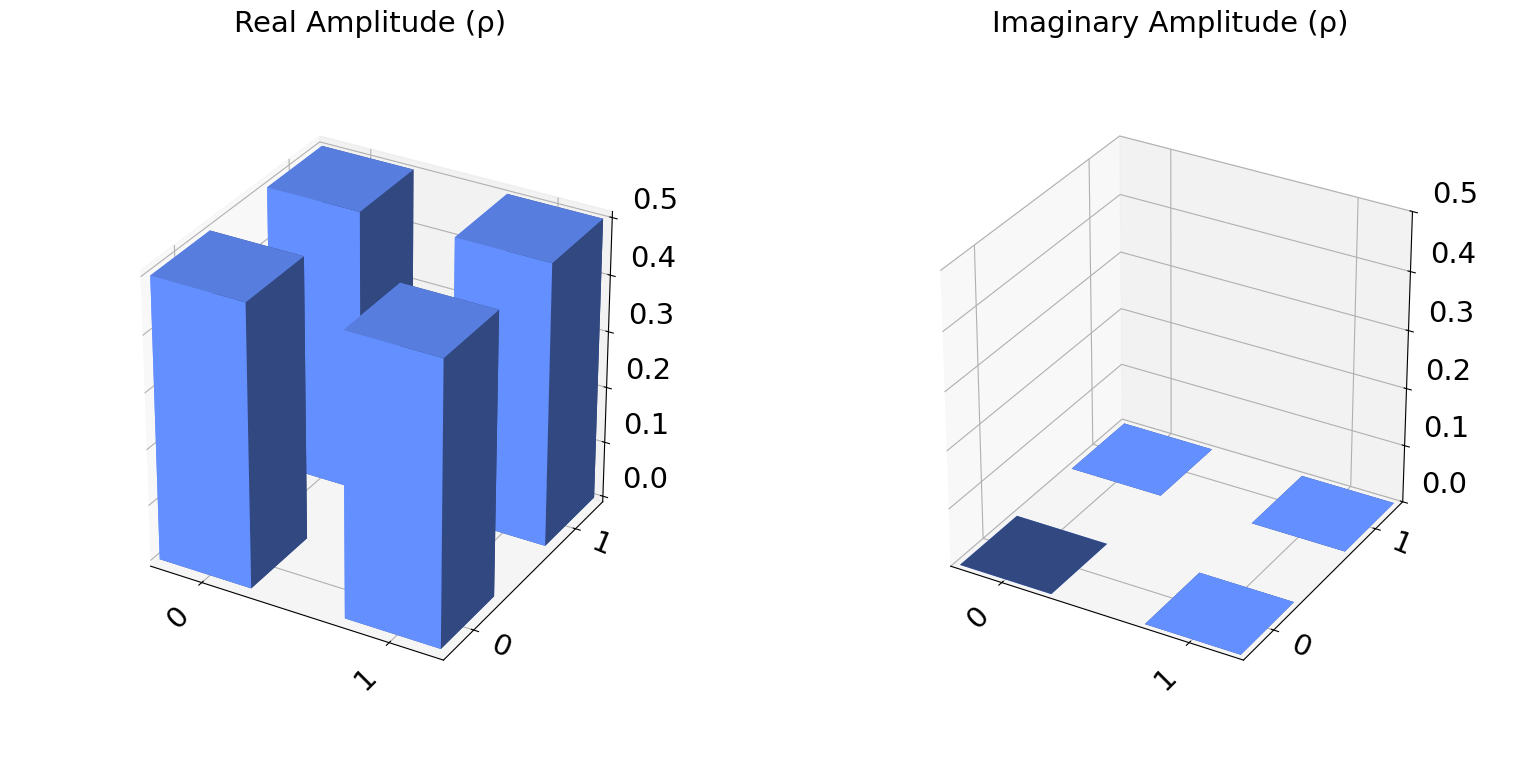

In [42]:
display(Statevector.from_label("+").draw('latex'))
display(Statevector.from_label("+").draw('city'))

... and for the $|-i\rangle$ state.

<IPython.core.display.Latex object>

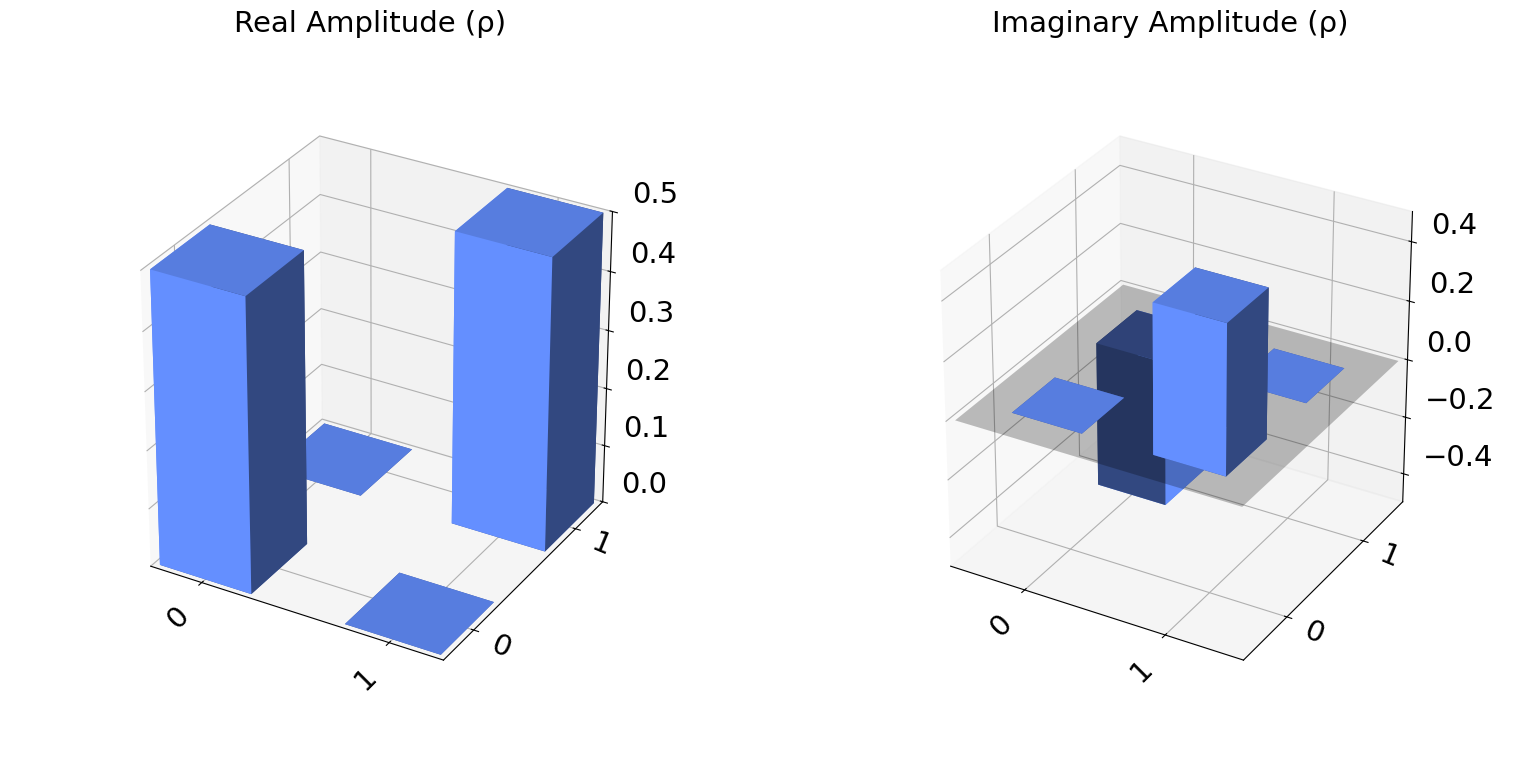

In [43]:
display(Statevector.from_label("l").draw('latex'))
display(Statevector.from_label("l").draw('city'))

As we see above, density matrix elements can take complex values.

For one qubit, the density matrix can be represented as a sum of the Pauli matrices, weighted by the expectation value for each Pauli matrix: $$\rho = \frac{\langle I\rangle I+\langle X\rangle X+\langle Y\rangle Y+\langle Z\rangle Z}{2}.$$

Note that expectation values for Pauli matrices are equivalent to expectation values for measurements in the corresponding basis, according to the scheme that we defined above of assigning a value of (+1) or (-1) to a measurement. Also, $\langle I \rangle = 1$.

We note that this formula for the density matrix contains exactly as much information as the Bloch sphere reconstruction from above. This suggests that reconstructing the density matrix for a state will allow us to learn a sufficient amount of information about the state. Additionally, for systems of more than one qubit, it will be more convenient to stick to density matrices, as there is no convenient Bloch sphere picture that can represent a multiqubit system.

For two qubits, $$\rho = \frac{\langle II\rangle II+\langle IX\rangle IX+\langle IY\rangle IY+\langle IZ\rangle IZ+\langle XI\rangle XI+\langle XX\rangle XX+\langle XY\rangle XY+\langle XZ\rangle XZ+\langle YI\rangle YI+\langle YX\rangle YX+\langle YY\rangle YY+\langle YZ\rangle YZ+\langle ZI\rangle ZI+\langle ZX\rangle ZX+\langle ZY\rangle ZY+\langle ZZ\rangle ZZ}{4},$$

where $\langle XY \rangle$ represents the expectation value of jointly measuring the first qubit in the X basis and the zeroth qubit in the Y basis.

In general, the formula for the density matrix of an n-qubit system is 

$$\rho = \frac{\sum_{P_i\in\{I,X,Y,Z\}^{n}}\langle P_i\rangle P_i}{2^n}.$$

In words, the density matrix is proportional to the sum of all the Pauli strings (products of single-qubit Pauli operators), weighted by the expectation value for each Pauli matrix.

Let's generate the four cardinal states again and randomly permute them.

In [44]:
state1, state2, state3, state4 = random.sample([Statevector.from_label('+'),
                                                Statevector.from_label('-'),
                                                Statevector.from_label('r'),
                                                Statevector.from_label('l')], 4) # randomly permuting the four options

Measuring only in the Z basis is not very useful, as we discussed above. The distributions are identical.

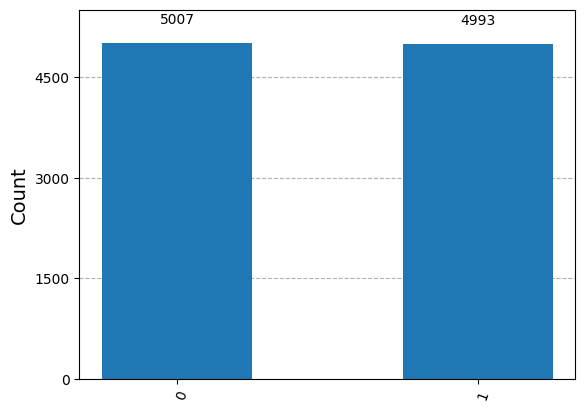

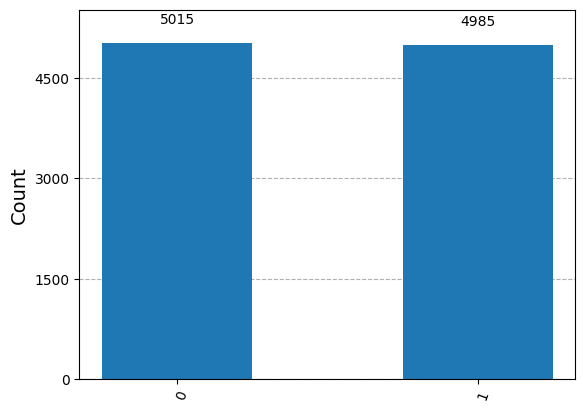

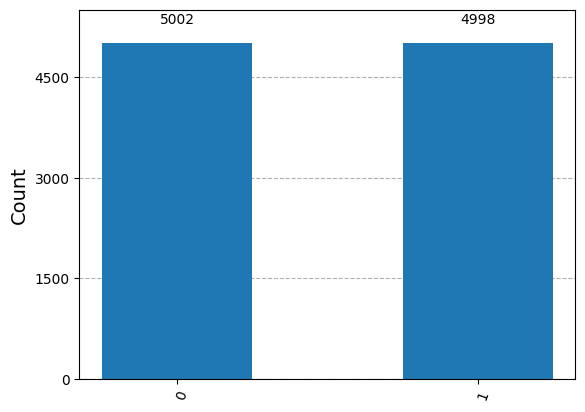

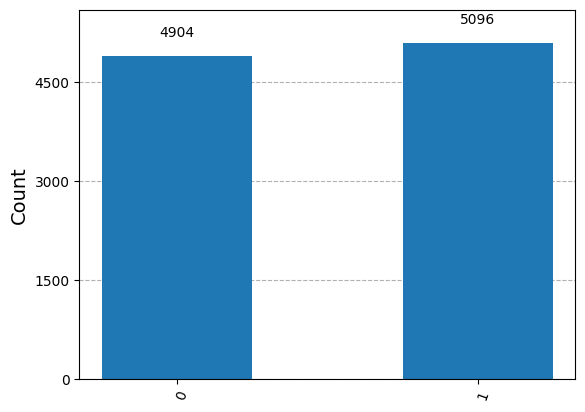

In [45]:
display(plot_histogram(state1.sample_counts(nshots)))
display(plot_histogram(state2.sample_counts(nshots)))
display(plot_histogram(state3.sample_counts(nshots)))
display(plot_histogram(state4.sample_counts(nshots)))

However, their density matrices look different (note the different signs). If we could reconstruct their density matrices, that might be useful for differentiating between the states.

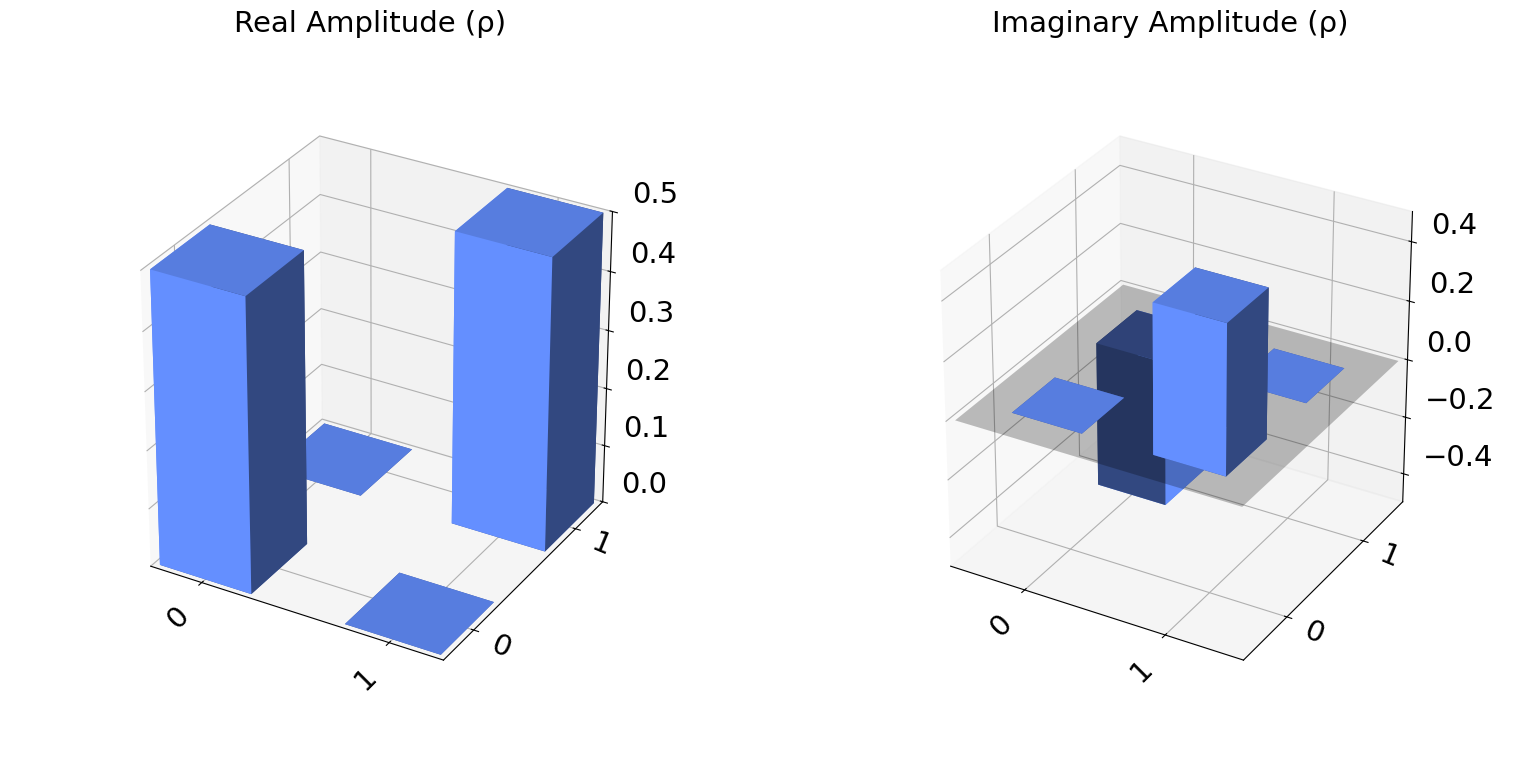

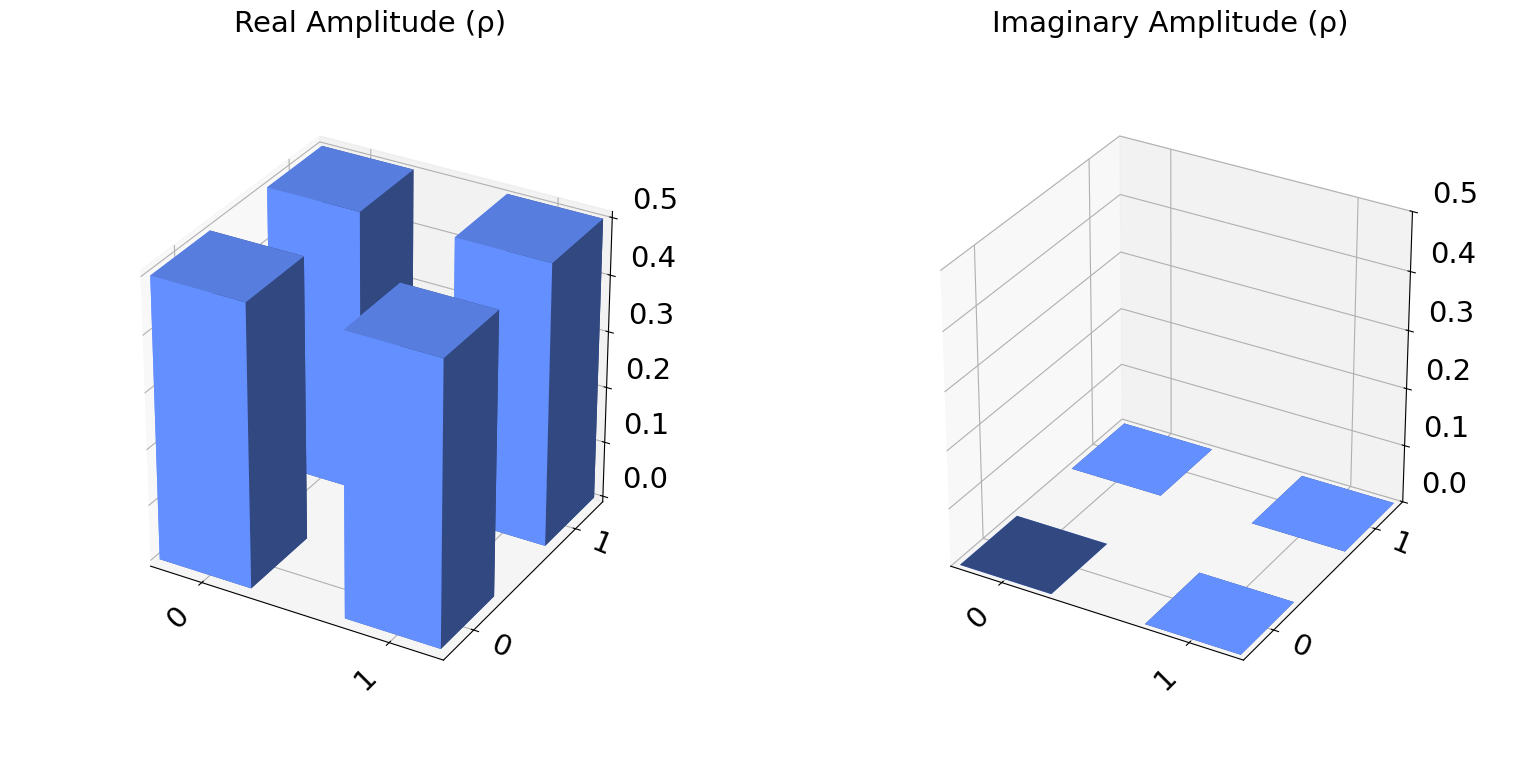

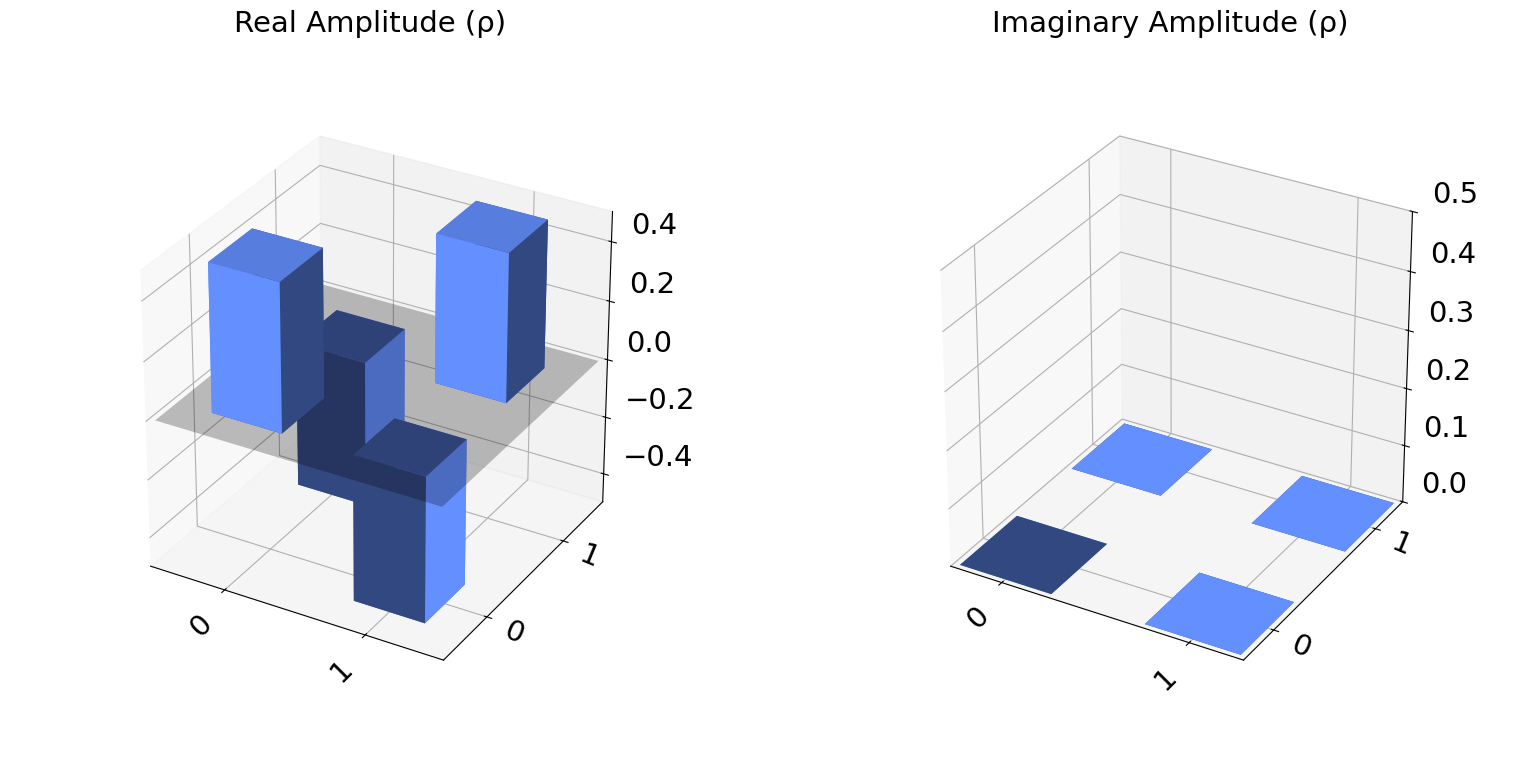

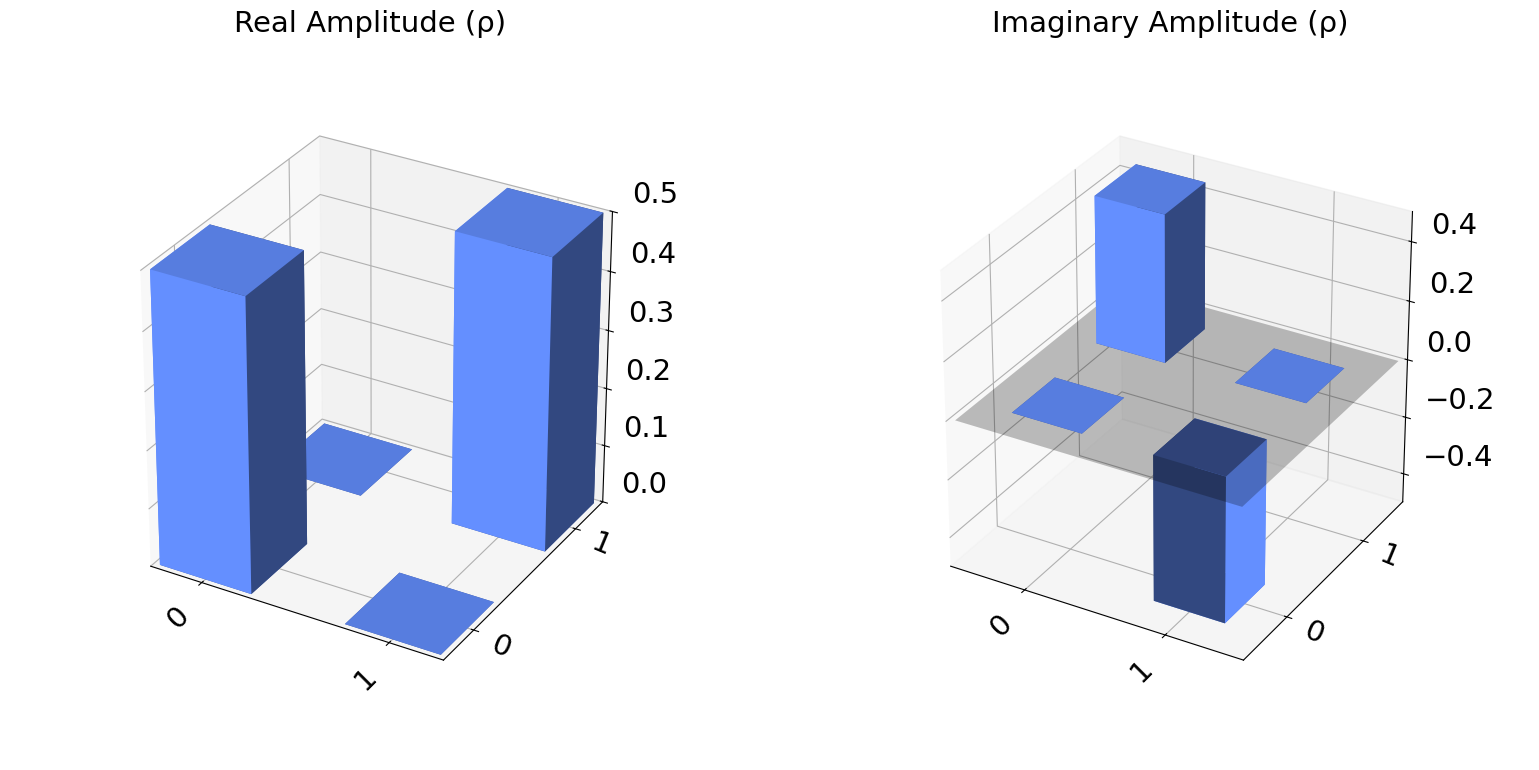

In [46]:
display(state1.draw('city'))
display(state2.draw('city'))
display(state3.draw('city'))
display(state4.draw('city'))

## Checkpoint

Can you match the above four density matrices to the correct states ($|+\rangle, |-\rangle, |+i\rangle, |-i\rangle$)?

In [47]:
display(state1.draw('latex'))
display(state2.draw('latex'))
display(state3.draw('latex'))
display(state4.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Final Notes on Density Matrices

What do all the parts of the density matrix represent?

The diagonal entries represent the probabilities of a measurement ending up in the respective computational state. Consequently, the trace of the density matrix, or the sum of its diagonal entries, will always be $1$, since total probability of the system being measured in some state is always 1.

The off-diagonal entries are known as "coherences" and represent the amount of "quantumness" in the system. We can exactly quantify the "quantumness" through a metric known as the purity, which is computed by taking the trace of the density matrix squared:

$$purity = Tr(\rho^2)$$

Use `density_matrix.purity()` to compute the purity of a density matrix.

The density matrix representation is useful because it also allows us to represent all kinds of states, including pure (quantum) states, fully classical states, and everything in between.

If we prepare the $|+\rangle$ state, a pure state, its density matrix is fully quantum.

**What is the purity of this state?**

On the other hand, if we take the $|+\rangle$ state and now measure it in the Z basis but don't look at the result, there is a 50% chance that it went to each of the $|0\rangle$ and $|1\rangle$ states. The state is no longer in a superposition (we collapsed the superposition when we measured), but it is in a probabilistic mixture of the $0$ and $1$ states. We can describe the new value of the state as $\rho = 0.5|0\rangle\langle 0| + 0.5|1\rangle\langle 1|$. This state is often referred to as the maximally mixed state.

**What is the purity of this state?**

Physical quantum systems are susceptible to error channels that induce loss. The effect is that the system "decoheres" over time. If we were to track the time evolution of the density matrix, we would see the off-diagonal terms shrinking. The purity would be somewhere between the two answers you gave above, trending from the first answer to the second answer as the loss terms entirely dominate and fully decohere the system.

Come talk to the lab staff if you want to learn more about errors!

## Exercises

Plot the density matrix for the maximally mixed state. Notice how the off-diagonal entries are zero! This means it is entirely a classical state, equivalent to a fair coin which has two equiprobable classical outcomes.

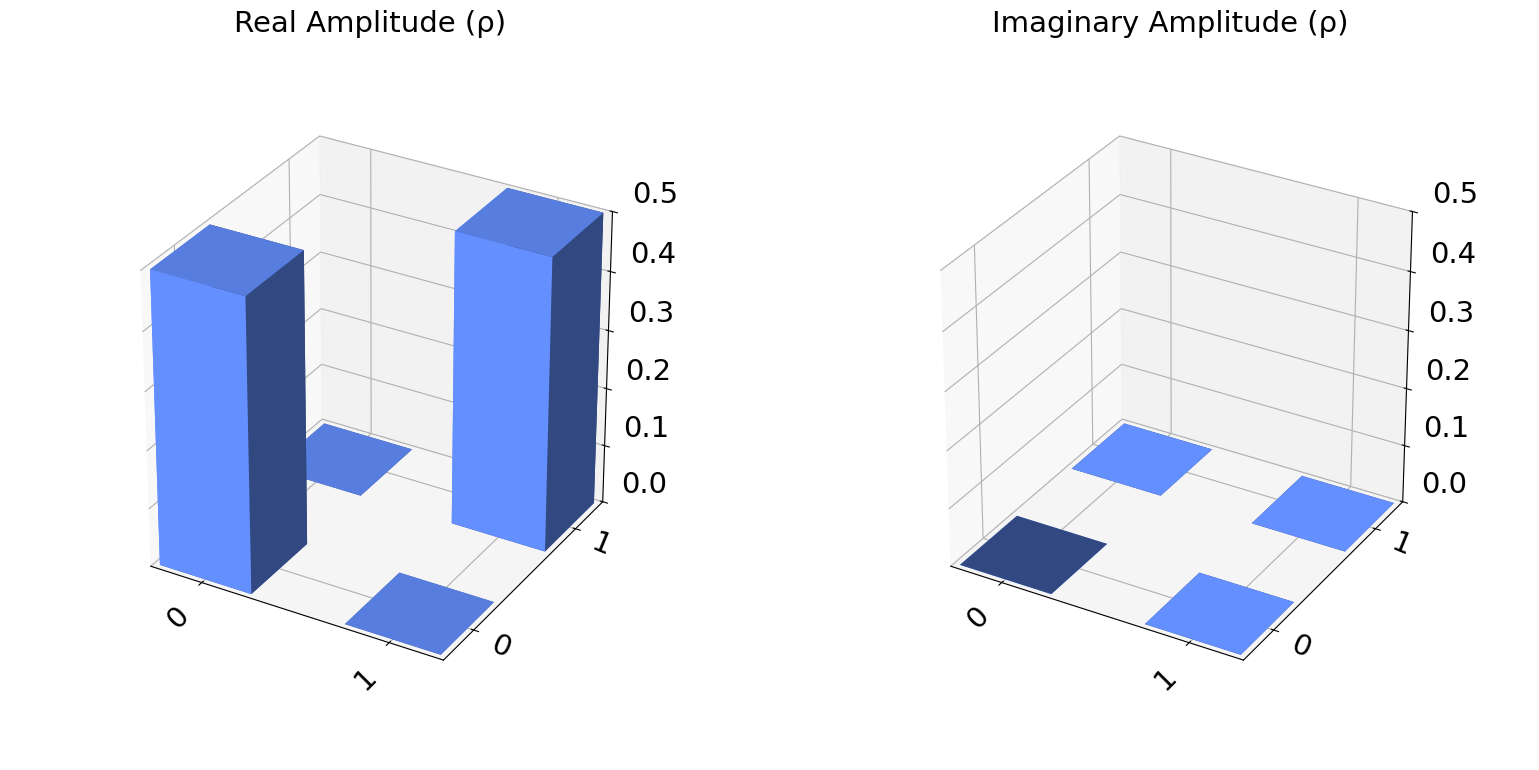

In [48]:
maximally_mixed_state = (DensityMatrix(Statevector.from_int(0,2)) + DensityMatrix(Statevector.from_int(1,2)))/2
display(maximally_mixed_state.draw('city'))

Measure the maximally mixed state in the $X$ basis and compare the result to measuring the $|+\rangle$ state in the X basis. Plot the histograms below.

Hint: you can take `maximally_mixed_state` that you created above and evolve it with `dm = maximally_mixed_state.evolve(qiskit.circuit.library.HGate())` to measure in another basis. Use `dm.sample_counts()` to obtain the counts.

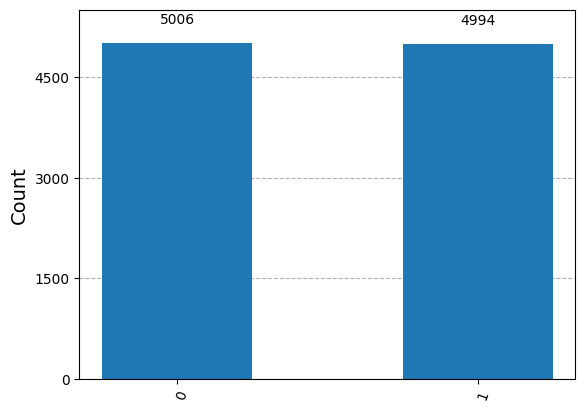

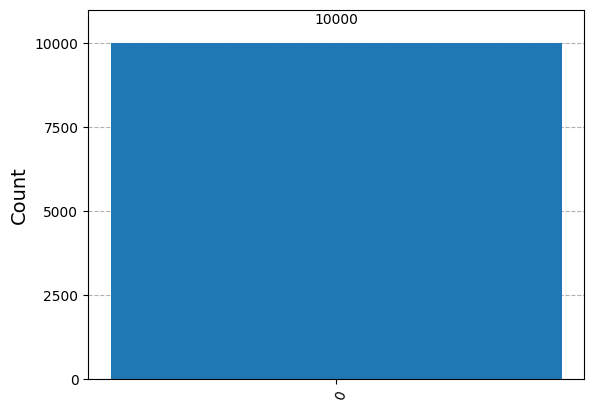

In [49]:
# plot the distribution for the maximally mixed state

maximally_mixed_state = (DensityMatrix(Statevector.from_int(0,2)) + DensityMatrix(Statevector.from_int(1,2)))/2 # generate MMS
counts = maximally_mixed_state.evolve(qiskit.circuit.library.HGate()).sample_counts(nshots) # measure in X basis
display(plot_histogram(counts))

# plot the distribution for the plus state

plus_state = DensityMatrix(Statevector.from_int(0,2).evolve(qiskit.circuit.library.HGate())) # generate plus state
counts = plus_state.evolve(qiskit.circuit.library.HGate()).sample_counts(nshots) # measure in X basis
display(plot_histogram(counts))

### Challenge Problem: Quantum State Tomography with Larger States


Quantum state tomography on larger states entails reconstructing the density matrix for the larger system and follows roughly the same process as above, albeit with far more measurements. For the two-qubit case, we already need to compute sixteen expectation values. Luckily, Qiskit gives us an easy shortcut to compute expectation values for long Pauli strings: `statevector.expectation_value(Pauli(pauli_string))`

Design a protocol to reconstruct the density matrix for a n-qubit state. You may use

```python
qc = QuantumCircuit(n)
qc.initialize(statevector)
```

as many times as you'd like to initialize your circuit with the input state. You may also call `statevector.expectation_value(Pauli(pauli_string))` instead of measuring `nshots` times in the respective basis and computing the expectation value manually. You may not investigate other properties of the `statevector` variable.


Hints:
* We made a function that generates all Pauli strings of length `n` (measurements on n qubits): `get_all_pauli_strings(n)`.
* You should also use `Pauli(pauli_string).to_matrix()`.
* Recall that $$\rho = \frac{\sum_{P_i\in\{I,X,Y,Z\}^{n}}\langle P_i\rangle P_i}{2^n}.$$

In [50]:
# write your protocol
def reconstruct_dm(statevector: Statevector, n):
    # Function to reconstruct the density matrix of an input state
    # Input: statevector: a Qiskit Statevector, n: the number of qubits
    # Output: a (2**n by 2**n) Qiskit DensityMatrix
    
    # starter code
    result = np.zeros((2**n, 2**n), dtype=np.complex128)
    for pauli_string in get_all_pauli_strings(n):
        result += statevector.expectation_value(Pauli(pauli_string))*Pauli(pauli_string).to_matrix()
    return DensityMatrix(result / 2**n)

purity of reconstructed density matrix is (0.9999999999999999-7.743959684198513e-18j)


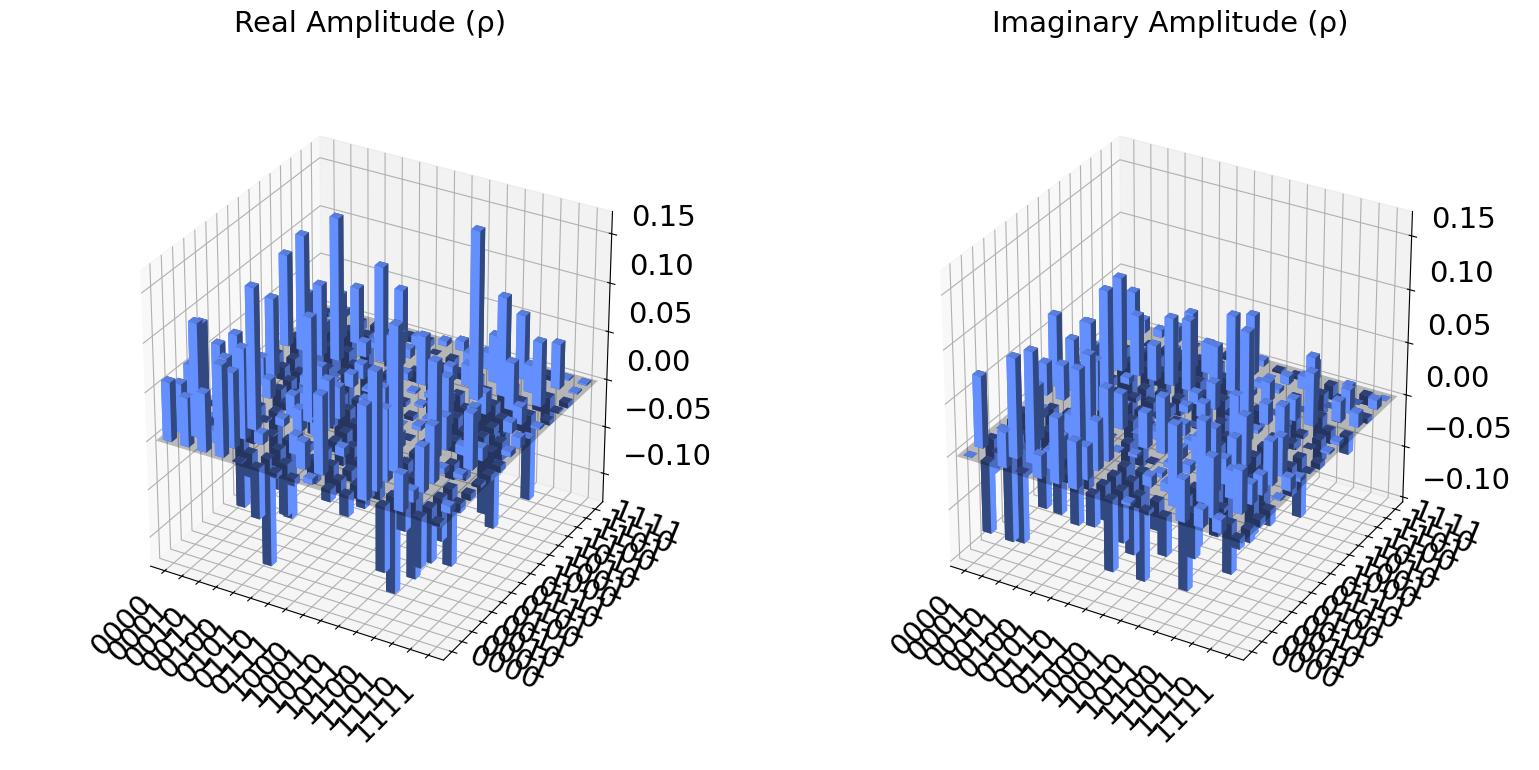

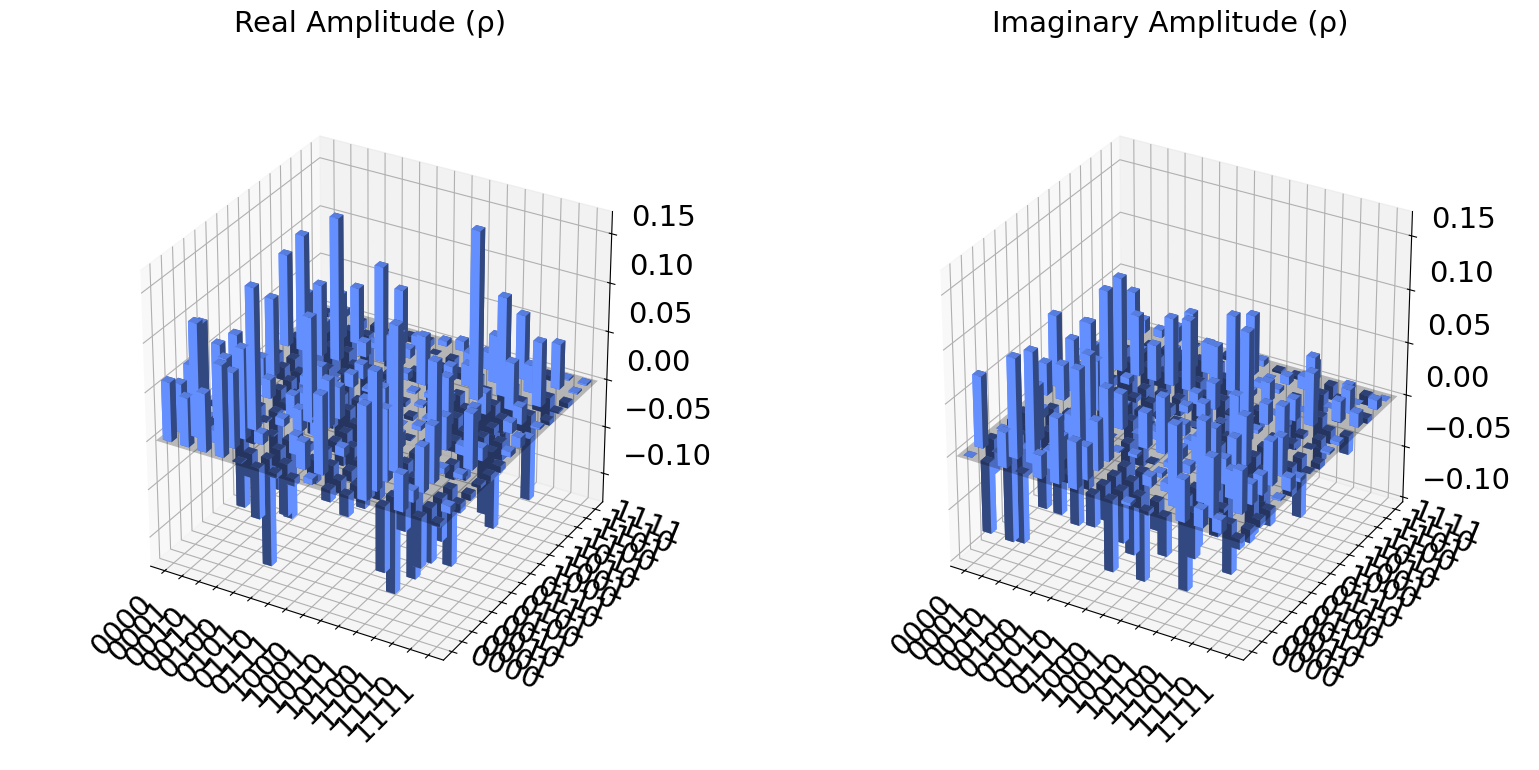

In [51]:
n = 4
statevector = random_statevector(2**n)
density_matrix = reconstruct_dm(statevector, n)
print("purity of reconstructed density matrix is", density_matrix.purity())
display(statevector.draw('city'))
display(density_matrix.draw('city'))

If everything went well, these should be the same.

### Challenge Problem: Recovering a Pure State from a Density Matrix

Let $\rho = |\psi\rangle\langle \psi|$ but we only have $\rho$ or some approximate reconstruction of $\rho$. How do we find $|\psi\rangle$?

Hint: use the spectral decomposition and diagonalize the matrix into its eigenbasis. What do you notice about the relative magnitudes of the eigenvalues?

In [52]:
def recover_state(rho):
    # Function to recover the pure state from a density matrix
    # Input: rho: a Qiskit DensityMatrix, n: the number of qubits
    # Output: a (2**n) unit vector

    eigvl, eigvc = np.linalg.eig(rho)
    result = eigvc[:,np.argmax(np.abs(eigvl))]
    return result/np.exp(1j*np.angle(result[0]))

In [53]:
n = 1

statevector = random_statevector(2**n)
phi = recover_state(DensityMatrix(statevector))
phi_rotated = phi/np.exp(1j*np.angle(phi[0]))*np.exp(1j*np.angle(statevector[0]))
print(statevector)
print(phi)
print(phi_rotated)
print(np.inner(statevector, phi_rotated.conj()))

Statevector([-0.66304857-0.52783274j, -0.20448877+0.48984032j],
            dims=(2,))
[ 0.84749088+0.j         -0.14509627-0.51059404j]
[-0.66304857-0.52783274j -0.20448877+0.48984032j]
(1-2.7755575615628914e-17j)


**We can spectrally decompose $\rho$ as a classical mixture of orthogonal pure states: $$\rho = \sum_i p_i |\phi_i\rangle \langle \phi_i |.$$ Up to numerics, only the largest $p_i$ will be nonzero.**

**The eigenvector corresponding to the largest eigenvalue is our best guess for $|\phi\rangle$. This will be equivalent to the initial state up to a global phase.**

### Challenge Problem: Quantum Process Tomography

Suppose we have an unknown quantum circuit whose behavior we want to characterize. The circuit's behavior can be described by a unitary matrix $U$ which we hope to find out.

We can run a similar procedure to quantum state tomography known as quantum process tomography. We will run the quantum circuit with various known quantum states as the input and perform quantum state tomography on each resulting output. Once we know how the quantum circuit operates on this set of states, we know how the quantum circuit will operate on any other pure state.

Design a protocol to reconstruct the unitary matrix for a one-qubit unitary operator. You may create as many quantum circuits as you'd like. You may use `statevector.evolve(u)` but you may not investigate other properties of the `u` variable. Reuse your quantum state tomography and pure state recovery protocols from above. How many times do you need to run quantum state tomography?

Hints:
* To obtain the computational basis vectors, use `statevector = Statevector.from_int(i, 2**n)`.
* You can compute the result of the circuit (as a density matrix) by invoking `output_dm = DensityMatrix(statevector.evolve(u))`. Do not directly access `statevector.evolve(u)` as a statevector.
* To find $|u_i\rangle$ from the reconstructed density matrix $\rho_i \approx |u_i\rangle\langle u_i|$ requires some work, as in the previous challenge problem. Due to the imprecision of this reconstruction process, you will have to find eigenstates $|u_{ik}\rangle$ of $\rho_i$ such that $\rho_i = \sum_k p_k |u_{ik}\rangle\langle u_{ik}|$ where $\sum_k p_k = 1$. If your density matrix reconstruction is well-behaved, one of the $p_k$ will be much larger than the others and the corresponding $|u_{ik}\rangle$ is a good guess for $|u_{i}\rangle$, up to a phase factor.
* Keep an eye out for phase! When you reconstruct $U$ from the $|u_{i}\rangle$, some of the columns might need an extra phase factor in relation to one another. Just sampling the computational basis is insufficient. You can assume that $U_{0,0} \in \mathbb{R}$.

In [54]:
import scipy

def reconstruct_operator(u, n):
    # Function to reconstruct the matrix of a unitary operator
    # Input: u: a Qiskit Operator with u[0,0] real, n: the number of qubits
    # Output: a (2**n by 2**n) unitary matrix

    result = np.zeros((2**n, 2**n), dtype=np.complex128)
    
    # compute each column vector, up to a global phase
    for i in range(2**n):
        statevector = Statevector.from_int(i, 2**n)
        output_dm = DensityMatrix(statevector.evolve(u))
        result[:,i] = recover_state(output_dm) # strips the relative phase

    # now we need to compute the relative phase
    # we fix the relative phase of U|0> at zero and determine the remaining relative phases
    # by passing superpositions of |0> and |i> through U and solving
    # for the equal-magnitude linear combination a*(U|0>) + b*(U|i>)
    # then if we rotate a to 0, the relative phase of U|i> is b/a 
    for i in range(1, 2**n):
        statevector = (Statevector.from_int(0,2**n)+Statevector.from_int(i,2**n))/np.sqrt(2)
        output_dm = DensityMatrix(statevector.evolve(u))
        recover = recover_state(output_dm) # removes the global phase
        # recover = (a*result[:,0]+b*result[:,i])/np.sqrt(2) where a, b are unit complex numbers
        # now we need to recover the relative phase between the states
        (a,b), residues, rank, singular_vals = np.linalg.lstsq(result[:,[0,i]], recover)
        # b/a should be the relative phase we need
        result[:,i] *= b/a
        
    return result

In [55]:
n = 1
(Statevector.from_int(0,2**n)+Statevector.from_int(1,2**n))/np.sqrt(2)
u_global_phase = qiskit.quantum_info.random_unitary(2**n)
u = u_global_phase/np.exp(1j*np.angle(u_global_phase.to_matrix()[0,0]))
operator = reconstruct_operator(u, n)
print(np.allclose(u.to_matrix(), operator))
print(u.to_matrix())
print(operator)

True
[[ 0.82968208-3.61827908e-18j -0.52569948-1.87796995e-01j]
 [-0.49403424+2.59918862e-01j -0.82142293+1.16776345e-01j]]
[[ 0.82968208+0.j         -0.52569948-0.187797j  ]
 [-0.49403424+0.25991886j -0.82142293+0.11677634j]]


Can you use your algorithm on a larger system? How many times do you need to run quantum state tomography?

In [56]:
n = 3
u_global_phase = qiskit.quantum_info.random_unitary(2**n)
u = u_global_phase/np.exp(1j*np.angle(u_global_phase.to_matrix()[0,0]))
operator = reconstruct_operator(u, n)
print(np.allclose(u.to_matrix(), operator))
print(u.to_matrix())
print(operator)
print()
for i in range(2**n):
    print(np.abs(u.to_matrix()[:,i]))
    print(np.abs(operator[:,i]))

True
[[ 0.11459937-2.07896606e-17j -0.13479139-8.66574845e-02j
   0.15840262-5.72920868e-01j  0.12284756+3.40985630e-01j
  -0.15220405-2.74728140e-01j  0.1939293 +5.39012915e-02j
  -0.1822212 -2.67464077e-01j -0.36273385+3.17841663e-01j]
 [ 0.18665087+3.55527111e-01j -0.04008464+1.31365041e-01j
   0.43616932-1.10893644e-01j  0.30584321-8.41107095e-02j
   0.16011602+4.99446890e-01j -0.36626754-8.84155420e-02j
  -0.25527852+1.20085270e-01j -0.07886164+1.17823204e-01j]
 [-0.1581778 +5.09532698e-01j -0.3592301 +1.64382322e-01j
  -0.24361866-3.54022459e-01j -0.2709585 -1.25101981e-01j
   0.17263621+6.93314068e-02j  0.11790737-7.57933754e-02j
  -0.05690623-3.01692747e-01j  0.18415084-3.21110847e-01j]
 [-0.09990121+1.44950775e-01j -0.02738881+2.46534601e-01j
  -0.08742037+1.93194085e-01j -0.04292293+3.81925088e-01j
   0.33482915+3.40107685e-01j  0.42396009+2.52630806e-01j
   0.25399854+5.69435614e-02j -0.0155426 +4.18875232e-01j]
 [-0.20092348-2.59561009e-01j  0.40086787+2.98670319e-01j
  -0.